Esta es la práctica de Guillermo Barrio correspondiente al módulo de Machine Learning 101. La práctica está formada únicamente por este fichero, que incorpora los comentarios y aclaraciones que se han considerado necesarios para su seguimiento y comprensión.

La práctica comienza con una separación entre train y test, y una limpieza de columnas no necesarias, para después continuar con una selección de outliers, relleno de datos no presentes (nan), e incorporación de columnas que pueden ser útiles. Estos cambios, pertenecientes al análisis exploratorio, se aplican a continuacion al dataframe de test.

Finalmente se aplican varios modelos de regresión, comenzando por Lasso, como medio embedded de selección de características, seguido de Random Forest.

Para empezar, cargamos las librerías necesarias para el análisis exploratorio.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

Cargamos el dataset, y lo dividimos entre train y test, quedándonos de momento solo con el de train, al que llamamos df.

In [2]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df = pd.read_csv('./train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


Echamos un primer vistazo al dataset de train, vemos que tiene 89 columnas, muchas de ellas de tipo no numérico.

In [3]:
df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,...,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,15520134,https://www.airbnb.com/rooms/15520134,20170407214119,2017-04-08,por persona la noche metro linea5 vista alegre,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",NaN,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557","Host Has Profile Pic,Host Identity Verified,Is..."
3,8809721,https://www.airbnb.com/rooms/8809721,20170407214119,2017-04-08,CITY CENTER JACINTO BENAVENTE ROOM4,This stunning and amazig room is covered with ...,NaN,This stunning and amazig room is covered with ...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"40.4128140929,-3.70305247638","Host Has Profile Pic,Requires License"
4,1162707,https://www.airbnb.com/rooms/1162707,20170407214119,2017-04-08,NICE & BIG DOUBLE ROOM AT DOWNTOWN,NaN,We are a young couple; David (Spain) and Ana (...,We are a young couple; David (Spain) and Ana (...,none,NaN,...,10.0,9.0,9.0,NaN,NaN,strict,2.0,2.08,"40.4386311984,-3.71371613279","Host Has Profile Pic,Host Identity Verified,Is..."


In [4]:
df.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object

In [5]:
df.head().T

,0,1,2,3,4
ID,5994463,14136180,15520134,8809721,1162707
Listing Url,https://www.airbnb.com/rooms/5994463,https://www.airbnb.com/rooms/14136180,https://www.airbnb.com/rooms/15520134,https://www.airbnb.com/rooms/8809721,https://www.airbnb.com/rooms/1162707
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,PISO ATOCHA- FLAT NEAR ATOCHA .,The Palace Sol Madrid.,por persona la noche metro linea5 vista alegre,CITY CENTER JACINTO BENAVENTE ROOM4,NICE & BIG DOUBLE ROOM AT DOWNTOWN
...,...,...,...,...,...
Cancellation Policy,moderate,flexible,moderate,strict,strict
Calculated host listings count,2,1,16,97,2
Reviews per Month,0.5,2.43,NaN,NaN,2.08
Geolocation,"40.4077318793,-3.68481869733","40.4158022422,-3.70534037765","40.3890481626,-3.74037392557","40.4128140929,-3.70305247638","40.4386311984,-3.71371613279"


Procedemos a eliminar columnas que no nos serán útiles para estimar el precio de los airbnb. Va a ser un proceso largo.

Claramente, los ID y los url de cada entrada no lo son, así que hacemos un drop.

In [6]:
df = df.drop(['ID'], axis = 1)

In [7]:
df = df.drop(['Listing Url'], axis = 1)

In [8]:
df.head().T

,0,1,2,3,4
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,PISO ATOCHA- FLAT NEAR ATOCHA .,The Palace Sol Madrid.,por persona la noche metro linea5 vista alegre,CITY CENTER JACINTO BENAVENTE ROOM4,NICE & BIG DOUBLE ROOM AT DOWNTOWN
Summary,Piso recién reformado cómoda habitación con ba...,"Lugares de interés: Plaza Mayor, Plaza del Sol...","我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",This stunning and amazig room is covered with ...,NaN
Space,"Un piso muy cómodo en Jerónimos, una de las zo...",El apartamento dispone de un dormitorio indepe...,NaN,NaN,We are a young couple; David (Spain) and Ana (...
...,...,...,...,...,...
Cancellation Policy,moderate,flexible,moderate,strict,strict
Calculated host listings count,2,1,16,97,2
Reviews per Month,0.5,2.43,NaN,NaN,2.08
Geolocation,"40.4077318793,-3.68481869733","40.4158022422,-3.70534037765","40.3890481626,-3.74037392557","40.4128140929,-3.70305247638","40.4386311984,-3.71371613279"


Nos encontramos con una columna de la fecha en la que fue scrapeado cada fila la última vez. Vemos que valores tiene, por si pudiese ser útil. No lo parece, pero por si acaso.

In [9]:
df['Last Scraped'].value_counts()

2017-04-08    10902
2017-03-15      303
2017-05-09       94
2017-03-05       71
2017-04-05       56
2017-05-03       52
2017-03-04       45
2017-05-08       42
2017-02-18       34
2017-04-02       27
2017-04-06       26
2017-05-04       26
2017-04-04       25
2017-04-03       17
2017-06-15       14
2017-06-03       13
2017-05-10        9
2017-05-11        8
2016-07-09        7
2017-05-05        6
2017-05-02        6
2016-01-04        6
2016-07-07        5
2017-06-02        4
2016-08-08        4
2017-05-12        3
2016-05-04        3
2017-03-07        3
2016-08-07        2
2016-04-12        2
2016-05-21        2
2016-04-11        2
2016-04-02        1
2017-04-07        1
2016-09-07        1
2016-05-18        1
2016-09-06        1
Name: Last Scraped, dtype: int64

Lo que sí es seguro es que el ID del scrapeado no es útil, como no lo son tampoco las columnas de 'name', 'summary' y 'space', todas con texto encima en varios idiomas. Por ello hacemos un drop de todas ellas.

In [10]:
df = df.drop(['Scrape ID'], axis = 1)

In [11]:
df = df.drop(['Name', 'Summary', 'Space'], axis = 1)

In [12]:
df.head().T

,0,1,2,3,4
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Description,Piso recién reformado cómoda habitación con ba...,"Lugares de interés: Plaza Mayor, Plaza del Sol...","我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",This stunning and amazig room is covered with ...,We are a young couple; David (Spain) and Ana (...
Experiences Offered,none,none,none,none,none
Neighborhood Overview,El barrio de Jeronimos es un enclave tranquilo...,"Situado en el corazón de Madrid, este apartame...",NaN,NaN,NaN
Notes,Facilitamos guía de eventos y rutas turísticas...,Hora llegada: a partir de las 15:00 horas Hora...,NaN,NaN,NaN
...,...,...,...,...,...
Cancellation Policy,moderate,flexible,moderate,strict,strict
Calculated host listings count,2,1,16,97,2
Reviews per Month,0.5,2.43,NaN,NaN,2.08
Geolocation,"40.4077318793,-3.68481869733","40.4158022422,-3.70534037765","40.3890481626,-3.74037392557","40.4128140929,-3.70305247638","40.4386311984,-3.71371613279"


Lo mismo nos ocurre con los campos 'Description', 'Neighborhood Overview' y 'Notes', así que hacemos también un drop con ellos.

In [13]:
df = df.drop(['Description', 'Neighborhood Overview', 'Notes'], axis = 1)

In [14]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-03-15,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Experiences Offered,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none
Transit,Excelente ubicación a tan solo 5 minutos andan...,"Acceso a todos los medios de trasporte, BUS, M...",羚羊Casa出发 --地铁Metro 5号线vsita alegre--opera转乘2号线...,NaN,NaN,El piso esta ubicado en PLENO CENTRO a tres mi...,El apartamento se encuentra a 5 m andando de l...,"Las estanciones más cercanas son Sol (L1, L2, ...",Bus routes from the airport are very regular. ...,You can get easily from the airport by bus or ...,NaN,Metro: Manuel Becerra (L2 and L6) Car: next to...,Perfecta comunicación,NaN,Arguelles metro station is just 5 min walking ...,NaN,NaN,NaN,Parking más cercano al loft (a 1 minuto en coc...,Muy bien comunicado Metro Linea 3 estación LAV...
Access,La conexión a internet por fibra óptica 100 MB...,NaN,NaN,NaN,WE CAN DO TO HOST COLLECTION SERVICE FROM THE ...,"La habitación es amplia y luminosa, tiene una ...",El alojamiento incluye la casa completa.,Tendrían a sus disposición todas las zonas com...,Beautifully finished with elegant decor and a ...,NaN,Common areas and bathroom are shared with the ...,NaN,NaN,NaN,NaN,======================================= LOCAT...,NaN,NaN,NaN,Fácil acceso desde la calle.
Interaction,Recibimos personalmente a nuestros huéspedes y...,Estimado huésped estaremos disponible todo el ...,NaN,NaN,NaN,NaN,Se me podrá contactar al móvil o correo en el ...,Estaremos disponibles para cualquier duda o co...,Our team is available on Airbnb App answering ...,NaN,NaN,With any doubt during your stay you can contac...,"Me encanta que se encuentren cómodos, cuando s...",NaN,"24h hot line, doorman in the building and owne...",======================================= IMPOR...,NaN,NaN,NaN,A la entrega de las llaves
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cancellation Policy,moderate,flexible,moderate,strict,strict,strict,flexible,strict,strict,strict,moderate,flexible,strict,moderate,strict,moderate,flexible,strict,strict,moderate
Calculated host listings count,2,1,16,97,2,1,1,97,63,28,4,7,2,2,4,1,2,1,4,5
Reviews per Month,0.5,2.43,NaN,NaN,2.08,1.4,1.61,NaN,0.61,0.12,4.57,NaN,1.65,2.2,1.47,2.28,NaN,0.63,2.57,3.43
Geolocation,"40.4077318793,-3.68481869733","40.4158022422,-3.70534037765","40.3890481626,-3.74037392557","40.4128140929,-3.70305247638","40.4386311984,-3.71371613279","40.4118798866,-3.70248065353","40.4150870948,-3.71099435105","40.4182655382,-3.70561688302","39.5398710947,2.59271623888","40.4264102972,-3.67327781258","40.40868291,-3.70015959501","40.4268801921,-3.66782718482","40.4172313077,-3.67820237216","40.4100931566,-3.70621618215","40.4293445537,-3.72228563651","40.4084274391,-3.69860013324","40.4200552646,-3.67636484189","40.4106587269,-3.70053801088","40.411726283,-3.71266218487","40.4088335332,-3.69819598327"


Vuelve a pasar lo mismo con las columnas 'Transit', 'Access' e 'Interaction', por lo que aplicamos un drop con ellas.

In [15]:
df = df.drop(['Transit', 'Access', 'Interaction'], axis = 1)

In [16]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-03-15,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Experiences Offered,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none
House Rules,El apartamento se encuentra en un edificio res...,- Oír música con volumen moderado. Entrada a p...,NaN,NaN,"In the apartment smoking is not allowed, but i...",• La hora de entrada es 12:00. No esta permiti...,NaN,NaN,PRESERVE OUR BEACHES (it is yours too). Don’t ...,Conozca nuestra politica con respecto a los ho...,- Trata la casa como si fuera la tuya.,NaN,El apartamento solo estará disponible para los...,NaN,Con el fin de mantener un ambiente relajado y ...,- PUEDES FUMAR FUERA hay una terraza estupenda...,NaN,NaN,El alojamiento se entregará limpio y ordenado ...,"Todo lo que está dentro del estudio, está a vu..."
Thumbnail Url,https://a0.muscache.com/im/pictures/74652419/f...,https://a0.muscache.com/im/pictures/1565a3a9-2...,https://a0.muscache.com/im/pictures/05baad20-7...,https://a0.muscache.com/im/pictures/111496270/...,https://a0.muscache.com/im/pictures/17487722/1...,https://a0.muscache.com/im/pictures/47595655/5...,NaN,https://a0.muscache.com/im/pictures/108421287/...,https://a0.muscache.com/im/pictures/c825f82a-3...,NaN,https://a0.muscache.com/im/pictures/3772f1bd-7...,https://a0.muscache.com/im/pictures/82745bcd-c...,https://a0.muscache.com/im/pictures/cde08841-4...,NaN,https://a0.muscache.com/im/pictures/59965718/b...,https://a0.muscache.com/im/pictures/900a01e0-f...,https://a0.muscache.com/im/pictures/2c95b404-d...,NaN,https://a0.muscache.com/im/pictures/73e281e4-5...,https://a0.muscache.com/im/pictures/45988968/c...
Medium Url,https://a0.muscache.com/im/pictures/74652419/f...,https://a0.muscache.com/im/pictures/1565a3a9-2...,https://a0.muscache.com/im/pictures/05baad20-7...,https://a0.muscache.com/im/pictures/111496270/...,https://a0.muscache.com/im/pictures/17487722/1...,https://a0.muscache.com/im/pictures/47595655/5...,NaN,https://a0.muscache.com/im/pictures/108421287/...,https://a0.muscache.com/im/pictures/c825f82a-3...,NaN,https://a0.muscache.com/im/pictures/3772f1bd-7...,https://a0.muscache.com/im/pictures/82745bcd-c...,https://a0.muscache.com/im/pictures/cde08841-4...,NaN,https://a0.muscache.com/im/pictures/59965718/b...,https://a0.muscache.com/im/pictures/900a01e0-f...,https://a0.muscache.com/im/pictures/2c95b404-d...,NaN,https://a0.muscache.com/im/pictures/73e281e4-5...,https://a0.muscache.com/im/pictures/45988968/c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cancellation Policy,moderate,flexible,moderate,strict,strict,strict,flexible,strict,strict,strict,moderate,flexible,strict,moderate,strict,moderate,flexible,strict,strict,moderate
Calculated host listings count,2,1,16,97,2,1,1,97,63,28,4,7,2,2,4,1,2,1,4,5
Reviews per Month,0.5,2.43,NaN,NaN,2.08,1.4,1.61,NaN,0.61,0.12,4.57,NaN,1.65,2.2,1.47,2.28,NaN,0.63,2.57,3.43
Geolocation,"40.4077318793,-3.68481869733","40.4158022422,-3.70534037765","40.3890481626,-3.74037392557","40.4128140929,-3.70305247638","40.4386311984,-3.71371613279","40.4118798866,-3.70248065353","40.4150870948,-3.71099435105","40.4182655382,-3.70561688302","39.5398710947,2.59271623888","40.4264102972,-3.67327781258","40.40868291,-3.70015959501","40.4268801921,-3.66782718482","40.4172313077,-3.67820237216","40.4100931566,-3.70621618215","40.4293445537,-3.72228563651","40.4084274391,-3.69860013324","40.4200552646,-3.67636484189","40.4106587269,-3.70053801088","40.411726283,-3.71266218487","40.4088335332,-3.69819598327"


Podemos ver una lista de los campos que van quedando, con el método list() de pandas. Se ve que obviamente hay campos importantes a priori, como Bedrooms, y otros que no, como 'Host URL'. Continuamos el análisis exploratorio.

In [17]:
list(df)

['Last Scraped',
 'Experiences Offered',
 'House Rules',
 'Thumbnail Url',
 'Medium Url',
 'Picture Url',
 'XL Picture Url',
 'Host ID',
 'Host URL',
 'Host Name',
 'Host Since',
 'Host Location',
 'Host About',
 'Host Response Time',
 'Host Response Rate',
 'Host Acceptance Rate',
 'Host Thumbnail Url',
 'Host Picture Url',
 'Host Neighbourhood',
 'Host Listings Count',
 'Host Total Listings Count',
 'Host Verifications',
 'Street',
 'Neighbourhood',
 'Neighbourhood Cleansed',
 'Neighbourhood Group Cleansed',
 'City',
 'State',
 'Zipcode',
 'Market',
 'Smart Location',
 'Country Code',
 'Country',
 'Latitude',
 'Longitude',
 'Property Type',
 'Room Type',
 'Accommodates',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Bed Type',
 'Amenities',
 'Square Feet',
 'Price',
 'Weekly Price',
 'Monthly Price',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Calendar Updated',
 'Has Availability',
 'Availability 30',
 'Availability 60',

Inmediatamente vemos que hay más columnas que no nos van a ser útiles, como todas aquellas que almacenan URLs, y texto que no podremos codificar como valores numéricos, como 'House Rules'. Hacemos un drop con ellas.

In [18]:
df = df.drop(['House Rules',
 'Thumbnail Url',
 'Medium Url',
 'Picture Url',
 'XL Picture Url'], axis = 1)

In [19]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-03-15,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Experiences Offered,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none
Host ID,31124866,85301317,84213235,15258781,1706029,15604118,2005372,15258781,4200246,596469,82696503,449990,22720373,51397305,2146727,49501483,68664241,9891936,4795421,17556638
Host URL,https://www.airbnb.com/users/show/31124866,https://www.airbnb.com/users/show/85301317,https://www.airbnb.com/users/show/84213235,https://www.airbnb.com/users/show/15258781,https://www.airbnb.com/users/show/1706029,https://www.airbnb.com/users/show/15604118,https://www.airbnb.com/users/show/2005372,https://www.airbnb.com/users/show/15258781,https://www.airbnb.com/users/show/4200246,https://www.airbnb.com/users/show/596469,https://www.airbnb.com/users/show/82696503,https://www.airbnb.com/users/show/449990,https://www.airbnb.com/users/show/22720373,https://www.airbnb.com/users/show/51397305,https://www.airbnb.com/users/show/2146727,https://www.airbnb.com/users/show/49501483,https://www.airbnb.com/users/show/68664241,https://www.airbnb.com/users/show/9891936,https://www.airbnb.com/users/show/4795421,https://www.airbnb.com/users/show/17556638
Host Name,Inava,Apartamentos Turísticos,玲,Erasmo´S,David Y Ana,Johnny Alberto,Elena,Erasmo´S,Pepe Pisos & Villas,Gabriel Avalos,Rem Y Suany,Silvia,Roberto,Mané,Carlos,Ana Y Bea,Luis Carlos,Oleg,Ana,Maria Jesús & Jorge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cancellation Policy,moderate,flexible,moderate,strict,strict,strict,flexible,strict,strict,strict,moderate,flexible,strict,moderate,strict,moderate,flexible,strict,strict,moderate
Calculated host listings count,2,1,16,97,2,1,1,97,63,28,4,7,2,2,4,1,2,1,4,5
Reviews per Month,0.5,2.43,NaN,NaN,2.08,1.4,1.61,NaN,0.61,0.12,4.57,NaN,1.65,2.2,1.47,2.28,NaN,0.63,2.57,3.43
Geolocation,"40.4077318793,-3.68481869733","40.4158022422,-3.70534037765","40.3890481626,-3.74037392557","40.4128140929,-3.70305247638","40.4386311984,-3.71371613279","40.4118798866,-3.70248065353","40.4150870948,-3.71099435105","40.4182655382,-3.70561688302","39.5398710947,2.59271623888","40.4264102972,-3.67327781258","40.40868291,-3.70015959501","40.4268801921,-3.66782718482","40.4172313077,-3.67820237216","40.4100931566,-3.70621618215","40.4293445537,-3.72228563651","40.4084274391,-3.69860013324","40.4200552646,-3.67636484189","40.4106587269,-3.70053801088","40.411726283,-3.71266218487","40.4088335332,-3.69819598327"


Hacemos lo propio con las columnas 'Host ID', 'Host URL' y 'Host Name' por las mismas razones. Qudan 69 columnas.

In [20]:
df = df.drop(['Host ID',
 'Host URL',
 'Host Name'], axis = 1)

In [21]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-03-15,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Experiences Offered,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none
Host Since,2015-04-13,2016-07-22,2016-07-17,2014-05-08,2012-02-06,2014-05-16,2012-03-25,2014-05-08,2012-11-20,2011-05-17,2016-07-09,2011-03-18,2014-10-19,2015-12-15,2012-04-15,2015-11-20,2016-04-24,2013-11-08,2013-01-21,2014-07-02
Host Location,"Arroyomolinos, Comunidad de Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Madrid, Spain","Madrid, Community of Madrid, Spain","Palma de Mallorca, Balearic Islands, Spain","Madrid, Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain"
Host About,NaN,Somos una empresa de turismo dedicada al aloj...,"Our hotel near the city center, next to the su...",Disfruta de tu habitación en el centro de Madr...,"Somos una pareja de Español y Colombiana, amab...",Ingeniero Industrial de profesión. Me gusta mu...,"soy una chica española, de 36 años. Antropolog...",Disfruta de tu habitación en el centro de Madr...,"We are Rafael, Sammy, Lis, Karina, Valdete, As...","Venezuelan architect, italian, spanish and Arg...",NaN,Será un placer recibiros aquí en Madrid e inte...,NaN,"Aunque soy de Madrid, desde hace 10 años traba...","If you have any question, please do not hesita...",NaN,NaN,"I'm a startup guy, currently building Hooks - ...","Urbanita, amante de la naturaleza y de las esc...",Somos unos enamorados de viajar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cancellation Policy,moderate,flexible,moderate,strict,strict,strict,flexible,strict,strict,strict,moderate,flexible,strict,moderate,strict,moderate,flexible,strict,strict,moderate
Calculated host listings count,2,1,16,97,2,1,1,97,63,28,4,7,2,2,4,1,2,1,4,5
Reviews per Month,0.5,2.43,NaN,NaN,2.08,1.4,1.61,NaN,0.61,0.12,4.57,NaN,1.65,2.2,1.47,2.28,NaN,0.63,2.57,3.43
Geolocation,"40.4077318793,-3.68481869733","40.4158022422,-3.70534037765","40.3890481626,-3.74037392557","40.4128140929,-3.70305247638","40.4386311984,-3.71371613279","40.4118798866,-3.70248065353","40.4150870948,-3.71099435105","40.4182655382,-3.70561688302","39.5398710947,2.59271623888","40.4264102972,-3.67327781258","40.40868291,-3.70015959501","40.4268801921,-3.66782718482","40.4172313077,-3.67820237216","40.4100931566,-3.70621618215","40.4293445537,-3.72228563651","40.4084274391,-3.69860013324","40.4200552646,-3.67636484189","40.4106587269,-3.70053801088","40.411726283,-3.71266218487","40.4088335332,-3.69819598327"


Igual con la columna 'Host About', que la eliminamos también. Modificamos los parámetros de pandas para ver todas las columnas de una vez con pd.set_options().

In [22]:
df = df.drop(['Host About'], axis = 1)

In [23]:
pd.set_option('display.max_rows', 75)

In [24]:
df.head(6).T

,0,1,2,3,4,5
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Experiences Offered,none,none,none,none,none,none
Host Since,2015-04-13,2016-07-22,2016-07-17,2014-05-08,2012-02-06,2014-05-16
Host Location,"Arroyomolinos, Comunidad de Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain"
Host Response Time,within a few hours,within an hour,within an hour,within a few hours,within an hour,within an hour
Host Response Rate,100,100,100,100,100,100
Host Acceptance Rate,NaN,NaN,NaN,NaN,NaN,NaN
Host Thumbnail Url,https://a0.muscache.com/im/users/31124866/prof...,https://a0.muscache.com/im/pictures/ff7ad016-4...,https://a0.muscache.com/im/pictures/a4185ec1-7...,https://a0.muscache.com/im/users/15258781/prof...,https://a0.muscache.com/im/users/1706029/profi...,https://a0.muscache.com/im/users/15604118/prof...
Host Picture Url,https://a0.muscache.com/im/users/31124866/prof...,https://a0.muscache.com/im/pictures/ff7ad016-4...,https://a0.muscache.com/im/pictures/a4185ec1-7...,https://a0.muscache.com/im/users/15258781/prof...,https://a0.muscache.com/im/users/1706029/profi...,https://a0.muscache.com/im/users/15604118/prof...
Host Neighbourhood,Jerónimos,NaN,Carabanchel,Justicia,Gaztambide,Embajadores


Vemos que hay dos columnas más con direcciones URL, que tampoco nos on útiles, hacemos un drop con ellas.

In [25]:
df = df.drop(['Host Thumbnail Url', 'Host Picture Url'], axis = 1)

In [26]:
df.head(6).T

,0,1,2,3,4,5
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Experiences Offered,none,none,none,none,none,none
Host Since,2015-04-13,2016-07-22,2016-07-17,2014-05-08,2012-02-06,2014-05-16
Host Location,"Arroyomolinos, Comunidad de Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain"
Host Response Time,within a few hours,within an hour,within an hour,within a few hours,within an hour,within an hour
Host Response Rate,100,100,100,100,100,100
Host Acceptance Rate,NaN,NaN,NaN,NaN,NaN,NaN
Host Neighbourhood,Jerónimos,NaN,Carabanchel,Justicia,Gaztambide,Embajadores
Host Listings Count,2,1,16,114,2,1
Host Total Listings Count,2,1,16,114,2,1


In [27]:
df

,Last Scraped,Experiences Offered,Host Since,Host Location,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,2017-04-08,none,2015-04-13,"Arroyomolinos, Comunidad de Madrid, Spain",within a few hours,100.0,NaN,Jerónimos,2.0,2.0,...,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,2017-04-08,none,2016-07-22,"Madrid, Community of Madrid, Spain",within an hour,100.0,NaN,NaN,1.0,1.0,...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,2017-04-08,none,2016-07-17,"Madrid, Community of Madrid, Spain",within an hour,100.0,NaN,Carabanchel,16.0,16.0,...,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557","Host Has Profile Pic,Host Identity Verified,Is..."
3,2017-04-08,none,2014-05-08,"Madrid, Community of Madrid, Spain",within a few hours,100.0,NaN,Justicia,114.0,114.0,...,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"40.4128140929,-3.70305247638","Host Has Profile Pic,Requires License"
4,2017-04-08,none,2012-02-06,"Madrid, Community of Madrid, Spain",within an hour,100.0,NaN,Gaztambide,2.0,2.0,...,10.0,9.0,9.0,NaN,NaN,strict,2.0,2.08,"40.4386311984,-3.71371613279","Host Has Profile Pic,Host Identity Verified,Is..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,2017-04-08,none,2017-03-26,"Madrid, Community of Madrid, Spain",within an hour,100.0,NaN,Argüelles,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,moderate,1.0,NaN,"40.4305590083,-3.7171074457","Host Has Profile Pic,Host Identity Verified,Is..."
11820,2017-04-08,none,2015-04-05,ES,within an hour,100.0,NaN,Aluche,2.0,2.0,...,10.0,9.0,9.0,VT 1963,NaN,strict,1.0,2.92,"40.3911261058,-3.75406768995","Host Has Profile Pic,Host Identity Verified,Is..."
11821,2017-04-08,none,2016-04-08,"Madrid, Community of Madrid, Spain",within an hour,100.0,NaN,NaN,1.0,1.0,...,10.0,10.0,10.0,NaN,NaN,strict,1.0,2.06,"40.416271007,-3.71309252937","Host Is Superhost,Host Has Profile Pic,Host Id..."
11822,2017-04-08,none,2016-06-15,"Madrid, Community of Madrid, Spain",within an hour,100.0,NaN,La Latina,1.0,1.0,...,10.0,10.0,10.0,NaN,NaN,strict,1.0,3.39,"40.4133971212,-3.71128018997","Host Is Superhost,Host Has Profile Pic,Is Loca..."


In [28]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-03-15,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Experiences Offered,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none
Host Since,2015-04-13,2016-07-22,2016-07-17,2014-05-08,2012-02-06,2014-05-16,2012-03-25,2014-05-08,2012-11-20,2011-05-17,2016-07-09,2011-03-18,2014-10-19,2015-12-15,2012-04-15,2015-11-20,2016-04-24,2013-11-08,2013-01-21,2014-07-02
Host Location,"Arroyomolinos, Comunidad de Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Madrid, Spain","Madrid, Community of Madrid, Spain","Palma de Mallorca, Balearic Islands, Spain","Madrid, Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain"
Host Response Time,within a few hours,within an hour,within an hour,within a few hours,within an hour,within an hour,within a few hours,within a few hours,within an hour,within an hour,within an hour,within an hour,within a few hours,within a day,within an hour,within an hour,NaN,within an hour,within a few hours,within an hour
Host Response Rate,100,100,100,100,100,100,100,100,97,100,100,89,100,79,100,100,NaN,100,100,100
Host Acceptance Rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Host Neighbourhood,Jerónimos,NaN,Carabanchel,Justicia,Gaztambide,Embajadores,NaN,Justicia,Palacio,Malasaña,Embajadores,Pacifico,NaN,La Latina,Argüelles,Embajadores,Ibiza,Embajadores,La Latina,Embajadores
Host Listings Count,2,1,16,114,2,1,1,114,68,28,4,8,2,2,4,1,2,1,5,6
Host Total Listings Count,2,1,16,114,2,1,1,114,68,28,4,8,2,2,4,1,2,1,5,6


En la columna Geolocation hay unos valores ya presentes en las colunas Latitude y Longitude, así que al ser redundante la podemos eliminar.

In [29]:
df = df.drop(['Geolocation'], axis = 1)

En la columna 'Experiences Offered' vemos que casi todos los valores son nulos o inexistentes, así no nos va a ser útil tampoco; hacemos pues un drop con ella.

In [30]:
df['Experiences Offered'].value_counts()

none        11810
business        6
social          3
family          3
romantic        2
Name: Experiences Offered, dtype: int64

In [31]:
df = df.drop(['Experiences Offered'], axis = 1)

In [32]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-03-15,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Host Since,2015-04-13,2016-07-22,2016-07-17,2014-05-08,2012-02-06,2014-05-16,2012-03-25,2014-05-08,2012-11-20,2011-05-17,2016-07-09,2011-03-18,2014-10-19,2015-12-15,2012-04-15,2015-11-20,2016-04-24,2013-11-08,2013-01-21,2014-07-02
Host Location,"Arroyomolinos, Comunidad de Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Madrid, Spain","Madrid, Community of Madrid, Spain","Palma de Mallorca, Balearic Islands, Spain","Madrid, Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain"
Host Response Time,within a few hours,within an hour,within an hour,within a few hours,within an hour,within an hour,within a few hours,within a few hours,within an hour,within an hour,within an hour,within an hour,within a few hours,within a day,within an hour,within an hour,NaN,within an hour,within a few hours,within an hour
Host Response Rate,100,100,100,100,100,100,100,100,97,100,100,89,100,79,100,100,NaN,100,100,100
Host Acceptance Rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Host Neighbourhood,Jerónimos,NaN,Carabanchel,Justicia,Gaztambide,Embajadores,NaN,Justicia,Palacio,Malasaña,Embajadores,Pacifico,NaN,La Latina,Argüelles,Embajadores,Ibiza,Embajadores,La Latina,Embajadores
Host Listings Count,2,1,16,114,2,1,1,114,68,28,4,8,2,2,4,1,2,1,5,6
Host Total Listings Count,2,1,16,114,2,1,1,114,68,28,4,8,2,2,4,1,2,1,5,6
Host Verifications,"email,phone,reviews,work_email","email,phone,reviews,jumio,offline_government_i...","email,phone,facebook,google,reviews,jumio,gove...","email,phone,reviews,work_email","email,phone,reviews,jumio","email,phone,reviews,jumio","email,phone,reviews","email,phone,reviews,work_email","email,phone,facebook,reviews,jumio","email,phone,reviews,jumio,work_email","email,phone,reviews,jumio,offline_government_i...","email,phone,reviews","email,phone,facebook,google,reviews","email,phone,facebook,reviews","email,phone,facebook,reviews,jumio","email,phone,reviews","email,phone","email,phone,linkedin,reviews,jumio","email,phone,reviews","email,phone,reviews"


Exploramos otras columnas, como 'Host Location', que nos podrían ser útiles, así que de momento no las eliminamos. Igual que 'Host Response Rate', que es fácilmente codificable.

In [33]:
df['Host Location'].value_counts()

Madrid, Community of Madrid, Spain        7536
ES                                        1060
Madrid, Madrid, Spain                     1047
Alcúdia, Balearic Islands, Spain           154
Barcelona, Catalonia, Spain                128
                                          ... 
San Antonio, Valparaiso, Chile               1
Moscow, Moscow, Russia                       1
Calamonte, Extremadura, Spain                1
Utrecht, Utrecht, Netherlands                1
Lake Forest, California, United States       1
Name: Host Location, Length: 497, dtype: int64

In [34]:
df['Host Response Time'].value_counts()

within an hour        6337
within a few hours    2291
within a day          1448
a few days or more     241
Name: Host Response Time, dtype: int64

In [35]:
df['Host Response Rate'].value_counts()

100.0    7763
90.0      269
96.0      236
99.0      205
75.0      181
98.0      164
80.0      148
50.0      134
0.0       126
97.0      118
94.0      115
86.0       65
95.0       62
67.0       59
89.0       59
92.0       58
70.0       55
88.0       53
93.0       45
83.0       42
60.0       35
91.0       34
40.0       31
33.0       28
82.0       16
71.0       16
79.0       13
85.0       13
78.0       12
87.0       11
25.0       10
57.0       10
76.0       10
73.0        9
63.0        9
55.0        8
69.0        7
65.0        7
46.0        6
47.0        6
56.0        5
20.0        5
64.0        5
72.0        5
30.0        5
81.0        5
77.0        4
84.0        3
35.0        3
43.0        3
68.0        3
29.0        3
11.0        2
61.0        2
10.0        2
13.0        2
74.0        2
62.0        1
28.0        1
59.0        1
26.0        1
24.0        1
41.0        1
54.0        1
27.0        1
9.0         1
42.0        1
Name: Host Response Rate, dtype: int64

Sin embargo, 'Host Acceptance Rate' tiene casi todos sus valores nulos, así que no nos será útil. Hacemos un drop.

In [36]:
df['Host Acceptance Rate'].value_counts()

100%    18
74%      2
0%       2
85%      2
67%      1
97%      1
88%      1
80%      1
96%      1
95%      1
Name: Host Acceptance Rate, dtype: int64

In [37]:
df = df.drop(['Host Acceptance Rate'], axis = 1)

La columna 'Neighbourhood Group Cleansed' parece hacer referencia al distrito donde se sitúa el airbnb. El que diga Cleansed siginifica que ya ha debido sufrir un tratamiento, con lo que no será útil. Dentro de los campos geográficos parece haber bastante redundancia.

In [38]:
df['Neighbourhood Group Cleansed'].value_counts()

Centro                      5433
Chamberí                     766
Salamanca                    719
Arganzuela                   639
Tetuán                       370
Moncloa - Aravaca            359
Retiro                       356
Latina                       296
Carabanchel                  289
Chamartín                    283
Ciudad Lineal                249
Puente de Vallecas           171
Hortaleza                    140
Fuencarral - El Pardo        132
Usera                        115
Eixample                      98
San Blas - Canillejas         91
Barajas                       68
Villaverde                    62
Moratalaz                     61
Villa de Vallecas             39
Ciutat Vella                  36
Gràcia                        31
Sants-Montjuïc                31
Vicálvaro                     29
Manhattan                     24
Brooklyn                      23
Isole                         12
Les Corts                     12
Friedrichshain-Kreuzberg      11
Sarrià-San

La columna sin duda tiene interés, como la de 'Smart Location', que no parece tener nan, y que debe haber sido ya tratada después del scraping.

In [39]:
df['City'].value_counts()

Madrid             10567
Barcelona            235
London               104
Paris                 85
Palma                 44
                   ...  
Darlinghurst           1
Berlín                 1
Queenscliff            1
Ginebra                1
Chelsea, London        1
Name: City, Length: 222, dtype: int64

In [40]:
df['Smart Location'].value_counts().sum()

11824

In [41]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-03-15,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Host Since,2015-04-13,2016-07-22,2016-07-17,2014-05-08,2012-02-06,2014-05-16,2012-03-25,2014-05-08,2012-11-20,2011-05-17,2016-07-09,2011-03-18,2014-10-19,2015-12-15,2012-04-15,2015-11-20,2016-04-24,2013-11-08,2013-01-21,2014-07-02
Host Location,"Arroyomolinos, Comunidad de Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Madrid, Spain","Madrid, Community of Madrid, Spain","Palma de Mallorca, Balearic Islands, Spain","Madrid, Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain"
Host Response Time,within a few hours,within an hour,within an hour,within a few hours,within an hour,within an hour,within a few hours,within a few hours,within an hour,within an hour,within an hour,within an hour,within a few hours,within a day,within an hour,within an hour,NaN,within an hour,within a few hours,within an hour
Host Response Rate,100,100,100,100,100,100,100,100,97,100,100,89,100,79,100,100,NaN,100,100,100
Host Neighbourhood,Jerónimos,NaN,Carabanchel,Justicia,Gaztambide,Embajadores,NaN,Justicia,Palacio,Malasaña,Embajadores,Pacifico,NaN,La Latina,Argüelles,Embajadores,Ibiza,Embajadores,La Latina,Embajadores
Host Listings Count,2,1,16,114,2,1,1,114,68,28,4,8,2,2,4,1,2,1,5,6
Host Total Listings Count,2,1,16,114,2,1,1,114,68,28,4,8,2,2,4,1,2,1,5,6
Host Verifications,"email,phone,reviews,work_email","email,phone,reviews,jumio,offline_government_i...","email,phone,facebook,google,reviews,jumio,gove...","email,phone,reviews,work_email","email,phone,reviews,jumio","email,phone,reviews,jumio","email,phone,reviews","email,phone,reviews,work_email","email,phone,facebook,reviews,jumio","email,phone,reviews,jumio,work_email","email,phone,reviews,jumio,offline_government_i...","email,phone,reviews","email,phone,facebook,google,reviews","email,phone,facebook,reviews","email,phone,facebook,reviews,jumio","email,phone,reviews","email,phone","email,phone,linkedin,reviews,jumio","email,phone,reviews","email,phone,reviews"
Street,"Jerónimos, Madrid, Comunidad de Madrid 28014, ...","Madrid, Comunidad de Madrid 28012, Spain","Carabanchel, Madrid, Comunidad de Madrid 28025...","Madrid, Comunidad de Madrid 28012, Spain","Gaztambide, Madrid, 28 28015, Spain","Embajadores, Madrid, Comunidad de Madrid 28012...","Madrid, Comunidad de Madrid 28005, Spain","Sol, Madrid, Comunidad de Madrid 28013, Spain","Illetes, Illes Balears 07181, Spain","Goya, Madrid, Comunidad de Madrid 28006, Spain","Embajadores, Madrid, Comunidad de Madrid 28012...","Fuente del Berro, Madrid, Comunidad de Madrid ...","Madrid, Comunidad de Madrid 28009, Spain","La Latina, Madrid, Comunidad de Madrid 28012, ...","Argüelles, Madrid, Madrid 28008, Spain","Embajadores, Madrid, Comunidad de Madrid 28012...","Ibiza, Madrid, Comunidad de Madrid 28009, Spain","Embajadores, Madrid, Comunidad de Madrid 28012...","La Latina, Madrid, Comunidad de Madrid 28005, ...","Embajadores, Madrid, Community of Madrid 28012..."


Las variables de 'Host Location' y 'Neighbourhood' nos parecen redundantes teniendo ya la de 'Smart Location' y 'Neighbourhood Cleansed', así que las eliminamos.  

'Host Verifications' tampoco parece muy útil; hacemos un drop con ella.

In [42]:
df = df.drop(['Host Location'], axis = 1)

In [43]:
df = df.drop(['Host Verifications'], axis = 1)

In [44]:
df = df.drop(['Neighbourhood'], axis = 1)

In [45]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-03-15,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Host Since,2015-04-13,2016-07-22,2016-07-17,2014-05-08,2012-02-06,2014-05-16,2012-03-25,2014-05-08,2012-11-20,2011-05-17,2016-07-09,2011-03-18,2014-10-19,2015-12-15,2012-04-15,2015-11-20,2016-04-24,2013-11-08,2013-01-21,2014-07-02
Host Response Time,within a few hours,within an hour,within an hour,within a few hours,within an hour,within an hour,within a few hours,within a few hours,within an hour,within an hour,within an hour,within an hour,within a few hours,within a day,within an hour,within an hour,NaN,within an hour,within a few hours,within an hour
Host Response Rate,100,100,100,100,100,100,100,100,97,100,100,89,100,79,100,100,NaN,100,100,100
Host Neighbourhood,Jerónimos,NaN,Carabanchel,Justicia,Gaztambide,Embajadores,NaN,Justicia,Palacio,Malasaña,Embajadores,Pacifico,NaN,La Latina,Argüelles,Embajadores,Ibiza,Embajadores,La Latina,Embajadores
Host Listings Count,2,1,16,114,2,1,1,114,68,28,4,8,2,2,4,1,2,1,5,6
Host Total Listings Count,2,1,16,114,2,1,1,114,68,28,4,8,2,2,4,1,2,1,5,6
Street,"Jerónimos, Madrid, Comunidad de Madrid 28014, ...","Madrid, Comunidad de Madrid 28012, Spain","Carabanchel, Madrid, Comunidad de Madrid 28025...","Madrid, Comunidad de Madrid 28012, Spain","Gaztambide, Madrid, 28 28015, Spain","Embajadores, Madrid, Comunidad de Madrid 28012...","Madrid, Comunidad de Madrid 28005, Spain","Sol, Madrid, Comunidad de Madrid 28013, Spain","Illetes, Illes Balears 07181, Spain","Goya, Madrid, Comunidad de Madrid 28006, Spain","Embajadores, Madrid, Comunidad de Madrid 28012...","Fuente del Berro, Madrid, Comunidad de Madrid ...","Madrid, Comunidad de Madrid 28009, Spain","La Latina, Madrid, Comunidad de Madrid 28012, ...","Argüelles, Madrid, Madrid 28008, Spain","Embajadores, Madrid, Comunidad de Madrid 28012...","Ibiza, Madrid, Comunidad de Madrid 28009, Spain","Embajadores, Madrid, Comunidad de Madrid 28012...","La Latina, Madrid, Comunidad de Madrid 28005, ...","Embajadores, Madrid, Community of Madrid 28012..."
Neighbourhood Cleansed,Jerónimos,Sol,Vista Alegre,Embajadores,Gaztambide,Embajadores,Palacio,Sol,Calvià,Goya,Embajadores,Fuente del Berro,Ibiza,Embajadores,Casa de Campo,Embajadores,Ibiza,Embajadores,Palacio,Embajadores
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí,Centro,Centro,Centro,NaN,Salamanca,Centro,Salamanca,Retiro,Centro,Moncloa - Aravaca,Centro,Retiro,Centro,Centro,Centro


'Security Deposit' parece interesante, y no tiene muchos nan, la mantenemos.

In [46]:
df['Security Deposit'].value_counts()

100.0    1330
200.0    1095
150.0     927
300.0     424
250.0     267
         ... 
66.0        1
702.0       1
399.0       1
351.0       1
295.0       1
Name: Security Deposit, Length: 115, dtype: int64

'Has Availability' solo tiene 9 valores en todo el dataset, así que la eliminamos. 

'Street' parece redundante también, ya que se refiere principalmente al barrio, viendo al menos lo que realmente contiene. La eliminamos.

In [47]:
df['Has Availability'].value_counts().sum()

9

In [48]:
df = df.drop(['Has Availability'], axis = 1)

In [49]:
df = df.drop(['Street'], axis = 1)

In [50]:
df.shape

(11824, 58)

In [51]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-03-15,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Host Since,2015-04-13,2016-07-22,2016-07-17,2014-05-08,2012-02-06,2014-05-16,2012-03-25,2014-05-08,2012-11-20,2011-05-17,2016-07-09,2011-03-18,2014-10-19,2015-12-15,2012-04-15,2015-11-20,2016-04-24,2013-11-08,2013-01-21,2014-07-02
Host Response Time,within a few hours,within an hour,within an hour,within a few hours,within an hour,within an hour,within a few hours,within a few hours,within an hour,within an hour,within an hour,within an hour,within a few hours,within a day,within an hour,within an hour,NaN,within an hour,within a few hours,within an hour
Host Response Rate,100,100,100,100,100,100,100,100,97,100,100,89,100,79,100,100,NaN,100,100,100
Host Neighbourhood,Jerónimos,NaN,Carabanchel,Justicia,Gaztambide,Embajadores,NaN,Justicia,Palacio,Malasaña,Embajadores,Pacifico,NaN,La Latina,Argüelles,Embajadores,Ibiza,Embajadores,La Latina,Embajadores
Host Listings Count,2,1,16,114,2,1,1,114,68,28,4,8,2,2,4,1,2,1,5,6
Host Total Listings Count,2,1,16,114,2,1,1,114,68,28,4,8,2,2,4,1,2,1,5,6
Neighbourhood Cleansed,Jerónimos,Sol,Vista Alegre,Embajadores,Gaztambide,Embajadores,Palacio,Sol,Calvià,Goya,Embajadores,Fuente del Berro,Ibiza,Embajadores,Casa de Campo,Embajadores,Ibiza,Embajadores,Palacio,Embajadores
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí,Centro,Centro,Centro,NaN,Salamanca,Centro,Salamanca,Retiro,Centro,Moncloa - Aravaca,Centro,Retiro,Centro,Centro,Centro
City,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Illetes,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid


En las columnas de 'City' y 'Market' parece haber una cierta redundancia que, si acaso trataremos más adelante.

In [52]:
df['City'].value_counts()

Madrid             10567
Barcelona            235
London               104
Paris                 85
Palma                 44
                   ...  
Darlinghurst           1
Berlín                 1
Queenscliff            1
Ginebra                1
Chelsea, London        1
Name: City, Length: 222, dtype: int64

In [53]:
df['City'].value_counts().sum()

11820

In [54]:
df['Market'].value_counts()

Madrid                   10621
Mallorca Island            300
Barcelona                  235
London                     113
Paris                       88
New York                    53
Rome                        49
Los Angeles                 37
Dublin                      34
Berlin                      33
Sydney                      29
Vienna                      26
Amsterdam                   19
Copenhagen                  13
Toronto                     13
Brussels                    13
Venice                      12
D.C.                         8
Other (International)        8
San Francisco                8
Chicago                      8
Melbourne                    8
Edinburgh                    7
Seattle                      6
San Diego                    4
Manchester                   4
New Orleans                  4
Geneva                       4
Austin                       3
Antwerp                      3
Denver                       3
Montreal                     2
Athens  

In [55]:
df['Market'].value_counts().sum()

11780

Entre las columnas de 'Host Listings Count' y 'Host Total Listings Count' hay una obvia redundancia, con lo que eliminamos una de ellas.

In [56]:
df.loc[df['Host Listings Count'] != df['Host Total Listings Count']]

,Last Scraped,Host Since,Host Response Time,Host Response Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,...,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Features
61,2017-04-08,NaN,NaN,NaN,NaN,NaN,NaN,Castillejos,Tetuán,Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"Is Location Exact,Requires License"
5970,2017-04-08,NaN,NaN,NaN,NaN,NaN,NaN,Vallehermoso,Chamberí,Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"Is Location Exact,Requires License"
9510,2017-04-08,NaN,NaN,NaN,NaN,NaN,NaN,San Diego,Puente de Vallecas,Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,Requires License


In [57]:
df = df.drop(['Host Listings Count'], axis = 1)

Con la columna de 'Last Scraped' no vemos una gran utilidad, ya que todas tienen la misma fecha, o casi, y encima al día siguiente de hacer el scrapping se puede hacer otro, sin que el resto del dataset cambie apreciablemente, o nada. Por ello es mejor eliminarla.

In [58]:
df['Last Scraped'].value_counts()

2017-04-08    10902
2017-03-15      303
2017-05-09       94
2017-03-05       71
2017-04-05       56
2017-05-03       52
2017-03-04       45
2017-05-08       42
2017-02-18       34
2017-04-02       27
2017-04-06       26
2017-05-04       26
2017-04-04       25
2017-04-03       17
2017-06-15       14
2017-06-03       13
2017-05-10        9
2017-05-11        8
2016-07-09        7
2017-05-05        6
2017-05-02        6
2016-01-04        6
2016-07-07        5
2017-06-02        4
2016-08-08        4
2017-05-12        3
2016-05-04        3
2017-03-07        3
2016-08-07        2
2016-04-12        2
2016-05-21        2
2016-04-11        2
2016-04-02        1
2017-04-07        1
2016-09-07        1
2016-05-18        1
2016-09-06        1
Name: Last Scraped, dtype: int64

In [59]:
df = df.drop(['Last Scraped'], axis = 1)

In [60]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Host Since,2015-04-13,2016-07-22,2016-07-17,2014-05-08,2012-02-06,2014-05-16,2012-03-25,2014-05-08,2012-11-20,2011-05-17,2016-07-09,2011-03-18,2014-10-19,2015-12-15,2012-04-15,2015-11-20,2016-04-24,2013-11-08,2013-01-21,2014-07-02
Host Response Time,within a few hours,within an hour,within an hour,within a few hours,within an hour,within an hour,within a few hours,within a few hours,within an hour,within an hour,within an hour,within an hour,within a few hours,within a day,within an hour,within an hour,NaN,within an hour,within a few hours,within an hour
Host Response Rate,100,100,100,100,100,100,100,100,97,100,100,89,100,79,100,100,NaN,100,100,100
Host Neighbourhood,Jerónimos,NaN,Carabanchel,Justicia,Gaztambide,Embajadores,NaN,Justicia,Palacio,Malasaña,Embajadores,Pacifico,NaN,La Latina,Argüelles,Embajadores,Ibiza,Embajadores,La Latina,Embajadores
Host Total Listings Count,2,1,16,114,2,1,1,114,68,28,4,8,2,2,4,1,2,1,5,6
Neighbourhood Cleansed,Jerónimos,Sol,Vista Alegre,Embajadores,Gaztambide,Embajadores,Palacio,Sol,Calvià,Goya,Embajadores,Fuente del Berro,Ibiza,Embajadores,Casa de Campo,Embajadores,Ibiza,Embajadores,Palacio,Embajadores
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí,Centro,Centro,Centro,NaN,Salamanca,Centro,Salamanca,Retiro,Centro,Moncloa - Aravaca,Centro,Retiro,Centro,Centro,Centro
City,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Illetes,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid
State,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,28,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Illes Balears,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Community of Madrid
Zipcode,28014,28012,28025,28012,28015,28012,28005,28013,07181,28006,28012,28028,28009,28012,28008,28012,28009,28012,28005,28012


In [61]:
list(df)

['Host Since',
 'Host Response Time',
 'Host Response Rate',
 'Host Neighbourhood',
 'Host Total Listings Count',
 'Neighbourhood Cleansed',
 'Neighbourhood Group Cleansed',
 'City',
 'State',
 'Zipcode',
 'Market',
 'Smart Location',
 'Country Code',
 'Country',
 'Latitude',
 'Longitude',
 'Property Type',
 'Room Type',
 'Accommodates',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Bed Type',
 'Amenities',
 'Square Feet',
 'Price',
 'Weekly Price',
 'Monthly Price',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Calendar Updated',
 'Availability 30',
 'Availability 60',
 'Availability 90',
 'Availability 365',
 'Calendar last Scraped',
 'Number of Reviews',
 'First Review',
 'Last Review',
 'Review Scores Rating',
 'Review Scores Accuracy',
 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Communication',
 'Review Scores Location',
 'Review Scores Value',
 'License',
 'Jurisdiction Names',
 'Cancellation

Respecto a las columnas de scores, el primer impulso es eliminar todas menos una, al estar seguro muy correlacionadas. Sin embargo, cuando calculamos las correlaciones entre ellas, éstas no resultan tan altas, así que, al menos de momento, las conservamos.

In [62]:
df[['Review Scores Rating',
 'Review Scores Accuracy',
 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Communication',
 'Review Scores Location',
 'Review Scores Value',]].corr()

,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value
Review Scores Rating,1.000000,0.755610,0.708071,0.605554,0.642890,0.418310,0.800256
Review Scores Accuracy,0.755610,1.000000,0.640098,0.552317,0.560764,0.364719,0.715473
Review Scores Cleanliness,0.708071,0.640098,1.000000,0.474737,0.477211,0.340106,0.647471
Review Scores Checkin,0.605554,0.552317,0.474737,1.000000,0.707698,0.326678,0.544209
Review Scores Communication,0.642890,0.560764,0.477211,0.707698,1.000000,0.348034,0.570425
Review Scores Location,0.418310,0.364719,0.340106,0.326678,0.348034,1.000000,0.422233
Review Scores Value,0.800256,0.715473,0.647471,0.544209,0.570425,0.422233,1.000000


Entre 'Country Code' y 'Country' hay una obvia redundancia. Para priorizar la claridad eliminamos la primera de ellas.

In [63]:
df['Country Code'].value_counts()

ES    11203
US      139
GB      127
FR       87
IT       61
AU       38
IE       34
DE       33
AT       26
NL       19
CA       16
BE       16
DK       14
CH        4
GR        3
HK        2
CU        1
It        1
Name: Country Code, dtype: int64

In [64]:
df['Country'].value_counts()

Spain             11203
United States       139
United Kingdom      127
France               87
Italy                61
Australia            38
Ireland              34
Germany              33
Austria              26
Netherlands          19
Canada               16
Belgium              16
Denmark              14
Switzerland           4
Greece                3
Hong Kong             2
Cuba                  1
Name: Country, dtype: int64

In [65]:
df = df.drop(['Country Code'], axis = 1)

'Amenities' resulta tener más de 10 mil valores diferentes por lo que en la práctica es imposible de codificar, la eliminamos. Caso contrario es el de 'Bed Type', por lo que la conservamos.

In [66]:
df['Amenities'].value_counts()

TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Hangers,Hair dryer,Iron,Laptop friendly workspace                                                                      38
TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Heating,Washer,Essentials,Shampoo                                                                                                                                                                      30
TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,Hangers,Hair dryer,Iron                                                                                                                    25
TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Ir

In [67]:
df['Amenities'].value_counts().sum()

11683

In [68]:
df = df.drop(['Amenities'], axis = 1)

In [69]:
df['Bed Type'].value_counts()

Real Bed         11565
Pull-out Sofa      201
Futon               36
Couch               17
Airbed               5
Name: Bed Type, dtype: int64

In [70]:
df.dtypes

Host Since                         object
Host Response Time                 object
Host Response Rate                float64
Host Neighbourhood                 object
Host Total Listings Count         float64
Neighbourhood Cleansed             object
Neighbourhood Group Cleansed       object
City                               object
State                              object
Zipcode                            object
Market                             object
Smart Location                     object
Country                            object
Latitude                          float64
Longitude                         float64
Property Type                      object
Room Type                          object
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Bed Type                           object
Square Feet                       float64
Price                             

In [71]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Host Since,2015-04-13,2016-07-22,2016-07-17,2014-05-08,2012-02-06,2014-05-16,2012-03-25,2014-05-08,2012-11-20,2011-05-17,2016-07-09,2011-03-18,2014-10-19,2015-12-15,2012-04-15,2015-11-20,2016-04-24,2013-11-08,2013-01-21,2014-07-02
Host Response Time,within a few hours,within an hour,within an hour,within a few hours,within an hour,within an hour,within a few hours,within a few hours,within an hour,within an hour,within an hour,within an hour,within a few hours,within a day,within an hour,within an hour,NaN,within an hour,within a few hours,within an hour
Host Response Rate,100,100,100,100,100,100,100,100,97,100,100,89,100,79,100,100,NaN,100,100,100
Host Neighbourhood,Jerónimos,NaN,Carabanchel,Justicia,Gaztambide,Embajadores,NaN,Justicia,Palacio,Malasaña,Embajadores,Pacifico,NaN,La Latina,Argüelles,Embajadores,Ibiza,Embajadores,La Latina,Embajadores
Host Total Listings Count,2,1,16,114,2,1,1,114,68,28,4,8,2,2,4,1,2,1,5,6
Neighbourhood Cleansed,Jerónimos,Sol,Vista Alegre,Embajadores,Gaztambide,Embajadores,Palacio,Sol,Calvià,Goya,Embajadores,Fuente del Berro,Ibiza,Embajadores,Casa de Campo,Embajadores,Ibiza,Embajadores,Palacio,Embajadores
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí,Centro,Centro,Centro,NaN,Salamanca,Centro,Salamanca,Retiro,Centro,Moncloa - Aravaca,Centro,Retiro,Centro,Centro,Centro
City,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Illetes,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid
State,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,28,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Illes Balears,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Community of Madrid
Zipcode,28014,28012,28025,28012,28015,28012,28005,28013,07181,28006,28012,28028,28009,28012,28008,28012,28009,28012,28005,28012


Por razones expuestas anteriormente, no tiene mucho sentido conservar la columna de 'Calendar last Scraped'

In [72]:
df = df.drop(['Calendar last Scraped'], axis = 1)

Con 'Features' lo primero que pensamos es eliminarla también, pero solo tiene 86 valores diferentes, así que, al menos de momento la conservamos.

'License' tiene casi todos sus valores nulos, luego es mejor eliminarla.



In [73]:
df['Features'].value_counts()

Host Has Profile Pic,Host Identity Verified,Is Location Exact,Requires License                                                                                     2007
Host Has Profile Pic,Is Location Exact,Requires License                                                                                                            1697
Host Has Profile Pic,Host Identity Verified,Is Location Exact,Requires License,Instant Bookable                                                                    1412
Host Has Profile Pic,Host Identity Verified,Requires License                                                                                                       1128
Host Has Profile Pic,Requires License                                                                                                                              1081
                                                                                                                                                                

In [74]:
df['Features'].value_counts().sum()

11823

In [75]:
df['License'].value_counts()

City registration pending    11
0215419-0                     4
HUTB-009034                   4
VT1046                        3
VT1003                        2
                             ..
VT-1833                       1
HUTB-006799                   1
VT-1881                       1
VT-1943                       1
VT-1578                       1
Name: License, Length: 252, dtype: int64

In [76]:
df['License'].value_counts().sum()

277

In [77]:
df = df.drop(['License'], axis = 1)

In [78]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Host Since,2015-04-13,2016-07-22,2016-07-17,2014-05-08,2012-02-06,2014-05-16,2012-03-25,2014-05-08,2012-11-20,2011-05-17,2016-07-09,2011-03-18,2014-10-19,2015-12-15,2012-04-15,2015-11-20,2016-04-24,2013-11-08,2013-01-21,2014-07-02
Host Response Time,within a few hours,within an hour,within an hour,within a few hours,within an hour,within an hour,within a few hours,within a few hours,within an hour,within an hour,within an hour,within an hour,within a few hours,within a day,within an hour,within an hour,NaN,within an hour,within a few hours,within an hour
Host Response Rate,100,100,100,100,100,100,100,100,97,100,100,89,100,79,100,100,NaN,100,100,100
Host Neighbourhood,Jerónimos,NaN,Carabanchel,Justicia,Gaztambide,Embajadores,NaN,Justicia,Palacio,Malasaña,Embajadores,Pacifico,NaN,La Latina,Argüelles,Embajadores,Ibiza,Embajadores,La Latina,Embajadores
Host Total Listings Count,2,1,16,114,2,1,1,114,68,28,4,8,2,2,4,1,2,1,5,6
Neighbourhood Cleansed,Jerónimos,Sol,Vista Alegre,Embajadores,Gaztambide,Embajadores,Palacio,Sol,Calvià,Goya,Embajadores,Fuente del Berro,Ibiza,Embajadores,Casa de Campo,Embajadores,Ibiza,Embajadores,Palacio,Embajadores
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí,Centro,Centro,Centro,NaN,Salamanca,Centro,Salamanca,Retiro,Centro,Moncloa - Aravaca,Centro,Retiro,Centro,Centro,Centro
City,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Illetes,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid
State,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,28,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Illes Balears,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Community of Madrid
Zipcode,28014,28012,28025,28012,28015,28012,28005,28013,07181,28006,28012,28028,28009,28012,28008,28012,28009,28012,28005,28012


Con 'Calendar Updated' nos pasa lo mismo que con las columnas de scrapping. Se cambian con mucha fecuencia, por lo que solo serían útiles los días posteriores al scrapping. En este momento es impormación no relevante. La eliminamos pues.

In [79]:
df = df.drop(['Calendar Updated'], axis = 1)

Vamos con otras columnas geográficas: 'Host Neighbourhood' parece redundante teniendo ya 'Neighbourhood Cleansed' y 'City' teniendo 'Smart Location', así que las eliminamos.

In [80]:
df = df.drop(['Host Neighbourhood'], axis = 1)

In [81]:
df['City'].value_counts()

Madrid             10567
Barcelona            235
London               104
Paris                 85
Palma                 44
                   ...  
Darlinghurst           1
Berlín                 1
Queenscliff            1
Ginebra                1
Chelsea, London        1
Name: City, Length: 222, dtype: int64

In [82]:
df['Smart Location'].value_counts()

Madrid, Spain                     10561
Barcelona, Spain                    233
London, United Kingdom              101
Paris, France                        85
Palma, Spain                         44
                                  ...  
Hospitalet de Llobregat, Spain        1
Llucalcari, Spain                     1
Costa dels Pins, Spain                1
Pasadena, CA                          1
Port d'Andratx, Spain                 1
Name: Smart Location, Length: 232, dtype: int64

In [83]:
df = df.drop(['City'], axis = 1)

In [84]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Host Since,2015-04-13,2016-07-22,2016-07-17,2014-05-08,2012-02-06,2014-05-16,2012-03-25,2014-05-08,2012-11-20,2011-05-17,2016-07-09,2011-03-18,2014-10-19,2015-12-15,2012-04-15,2015-11-20,2016-04-24,2013-11-08,2013-01-21,2014-07-02
Host Response Time,within a few hours,within an hour,within an hour,within a few hours,within an hour,within an hour,within a few hours,within a few hours,within an hour,within an hour,within an hour,within an hour,within a few hours,within a day,within an hour,within an hour,NaN,within an hour,within a few hours,within an hour
Host Response Rate,100,100,100,100,100,100,100,100,97,100,100,89,100,79,100,100,NaN,100,100,100
Host Total Listings Count,2,1,16,114,2,1,1,114,68,28,4,8,2,2,4,1,2,1,5,6
Neighbourhood Cleansed,Jerónimos,Sol,Vista Alegre,Embajadores,Gaztambide,Embajadores,Palacio,Sol,Calvià,Goya,Embajadores,Fuente del Berro,Ibiza,Embajadores,Casa de Campo,Embajadores,Ibiza,Embajadores,Palacio,Embajadores
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí,Centro,Centro,Centro,NaN,Salamanca,Centro,Salamanca,Retiro,Centro,Moncloa - Aravaca,Centro,Retiro,Centro,Centro,Centro
State,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,28,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Illes Balears,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Community of Madrid
Zipcode,28014,28012,28025,28012,28015,28012,28005,28013,07181,28006,28012,28028,28009,28012,28008,28012,28009,28012,28005,28012
Market,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Mallorca Island,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid
Smart Location,"Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Illetes, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain"


'Country' es redundante teniendo 'Smart Location', así que la eliminamos. Sin embargo, 'State' puede ser útil, al menos en teoría; de momento la conservamos.

In [85]:
df = df.drop(['Country'], axis = 1)

In [86]:
df['State'].value_counts()

Comunidad de Madrid    8507
Community of Madrid    1497
Madrid                  543
Catalunya               154
Balearic Islands        137
                       ... 
londres                   1
Copenhagen                1
BA                        1
stoke newington           1
MA                        1
Name: State, Length: 93, dtype: int64

In [87]:
df['State'].value_counts().sum()

11705

In [88]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Host Since,2015-04-13,2016-07-22,2016-07-17,2014-05-08,2012-02-06,2014-05-16,2012-03-25,2014-05-08,2012-11-20,2011-05-17,2016-07-09,2011-03-18,2014-10-19,2015-12-15,2012-04-15,2015-11-20,2016-04-24,2013-11-08,2013-01-21,2014-07-02
Host Response Time,within a few hours,within an hour,within an hour,within a few hours,within an hour,within an hour,within a few hours,within a few hours,within an hour,within an hour,within an hour,within an hour,within a few hours,within a day,within an hour,within an hour,NaN,within an hour,within a few hours,within an hour
Host Response Rate,100,100,100,100,100,100,100,100,97,100,100,89,100,79,100,100,NaN,100,100,100
Host Total Listings Count,2,1,16,114,2,1,1,114,68,28,4,8,2,2,4,1,2,1,5,6
Neighbourhood Cleansed,Jerónimos,Sol,Vista Alegre,Embajadores,Gaztambide,Embajadores,Palacio,Sol,Calvià,Goya,Embajadores,Fuente del Berro,Ibiza,Embajadores,Casa de Campo,Embajadores,Ibiza,Embajadores,Palacio,Embajadores
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí,Centro,Centro,Centro,NaN,Salamanca,Centro,Salamanca,Retiro,Centro,Moncloa - Aravaca,Centro,Retiro,Centro,Centro,Centro
State,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,28,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Illes Balears,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Community of Madrid
Zipcode,28014,28012,28025,28012,28015,28012,28005,28013,07181,28006,28012,28028,28009,28012,28008,28012,28009,28012,28005,28012
Market,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Mallorca Island,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid
Smart Location,"Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Illetes, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain"


In [89]:
df.shape

(11824, 48)

Echamos un primer vistazo a las variables numéricas con describe(). La mayor parte de ellas tienen pocos nan, aunque sí parece haber algunos outliers.

Una pena que la columna de superficie, sq feet, tenga tan pocas entradas. Trataremos ese tema más adelante.

In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,10317.0,94.803722,15.247078,0.000000,100.000000,100.000000,100.000000,100.000000
Host Total Listings Count,11821.0,12.754420,34.578895,0.000000,1.000000,2.000000,6.000000,519.000000
Latitude,11824.0,40.491628,4.701030,-37.851182,40.409758,40.419331,40.430778,55.966912
Longitude,11824.0,-3.776863,14.014695,-123.124429,-3.707538,-3.700763,-3.683917,153.371427
Accommodates,11824.0,3.277486,2.093973,1.000000,2.000000,3.000000,4.000000,16.000000
Bathrooms,11780.0,1.285229,0.664691,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,11804.0,1.344290,0.905180,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,11787.0,2.049122,1.623489,1.000000,1.000000,2.000000,2.000000,16.000000
Square Feet,474.0,396.489451,671.125823,0.000000,0.000000,90.000000,624.000000,6997.000000
Price,11809.0,73.712592,71.624844,9.000000,34.000000,55.000000,87.000000,969.000000


In [91]:
df.dtypes

Host Since                         object
Host Response Time                 object
Host Response Rate                float64
Host Total Listings Count         float64
Neighbourhood Cleansed             object
Neighbourhood Group Cleansed       object
State                              object
Zipcode                            object
Market                             object
Smart Location                     object
Latitude                          float64
Longitude                         float64
Property Type                      object
Room Type                          object
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Bed Type                           object
Square Feet                       float64
Price                             float64
Weekly Price                      float64
Monthly Price                     float64
Security Deposit                  

Casi todos los valores de 'Jurisdiction Names' tienen valores nulos, así que la eliminamos.

Por el contrario, 'Cancellation Policy' sí que puede ser categorizada, así que la conservamos.

In [92]:
df['Jurisdiction Names'].value_counts()

Paris                                                                                        85
City of Los Angeles, CA                                                                      28
Amsterdam                                                                                    18
DISTRICT OF COLUMBIA, WASHINGTON                                                              9
SAN FRANCISCO                                                                                 8
Illinois State, Cook County, IL, CHICAGO                                                      8
WASHINGTON                                                                                    6
SAN DIEGO, SAN DIEGO TOURISM MARKETING DISTRICT A, SAN DIEGO TOURISM MARKETING DISTRICT B     5
Louisiana State, New Orleans, LA                                                              4
Santa Monica                                                                                  2
OAKLAND                                 

In [93]:
df = df.drop(['Jurisdiction Names'], axis = 1)

In [94]:
df['Cancellation Policy'].value_counts()

strict             4590
flexible           3756
moderate           3376
strict_new           30
super_strict_60      24
moderate_new         18
super_strict_30      17
flexible_new         13
Name: Cancellation Policy, dtype: int64

In [95]:
df.dtypes

Host Since                         object
Host Response Time                 object
Host Response Rate                float64
Host Total Listings Count         float64
Neighbourhood Cleansed             object
Neighbourhood Group Cleansed       object
State                              object
Zipcode                            object
Market                             object
Smart Location                     object
Latitude                          float64
Longitude                         float64
Property Type                      object
Room Type                          object
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Bed Type                           object
Square Feet                       float64
Price                             float64
Weekly Price                      float64
Monthly Price                     float64
Security Deposit                  

In [96]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Host Since,2015-04-13,2016-07-22,2016-07-17,2014-05-08,2012-02-06,2014-05-16,2012-03-25,2014-05-08,2012-11-20,2011-05-17,2016-07-09,2011-03-18,2014-10-19,2015-12-15,2012-04-15,2015-11-20,2016-04-24,2013-11-08,2013-01-21,2014-07-02
Host Response Time,within a few hours,within an hour,within an hour,within a few hours,within an hour,within an hour,within a few hours,within a few hours,within an hour,within an hour,within an hour,within an hour,within a few hours,within a day,within an hour,within an hour,NaN,within an hour,within a few hours,within an hour
Host Response Rate,100,100,100,100,100,100,100,100,97,100,100,89,100,79,100,100,NaN,100,100,100
Host Total Listings Count,2,1,16,114,2,1,1,114,68,28,4,8,2,2,4,1,2,1,5,6
Neighbourhood Cleansed,Jerónimos,Sol,Vista Alegre,Embajadores,Gaztambide,Embajadores,Palacio,Sol,Calvià,Goya,Embajadores,Fuente del Berro,Ibiza,Embajadores,Casa de Campo,Embajadores,Ibiza,Embajadores,Palacio,Embajadores
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí,Centro,Centro,Centro,NaN,Salamanca,Centro,Salamanca,Retiro,Centro,Moncloa - Aravaca,Centro,Retiro,Centro,Centro,Centro
State,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,28,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Illes Balears,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Community of Madrid
Zipcode,28014,28012,28025,28012,28015,28012,28005,28013,07181,28006,28012,28028,28009,28012,28008,28012,28009,28012,28005,28012
Market,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Mallorca Island,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid
Smart Location,"Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Illetes, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain"


Queda bastante por hacer en el análisis exploratorio, y en la modificación de las columnas, pero podemos echar un vistazo gráfico a algunas de ellas para ver cómo están distribuidas, mediante histogramas. De nuevo, en algunos casos se comprueba la presencia de outliers, que trataremos más adelante.

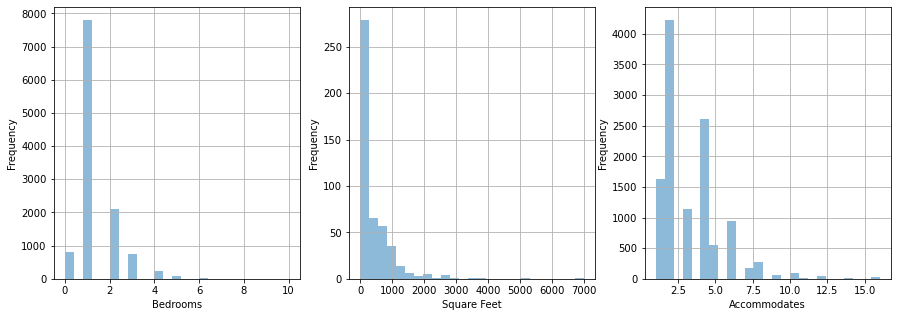

In [97]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
plt.xlabel('Bedrooms')

plt.subplot(1,3,2)
df['Square Feet'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Square Feet')

plt.subplot(1,3,3)
df['Accommodates'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Accommodates')

plt.show()

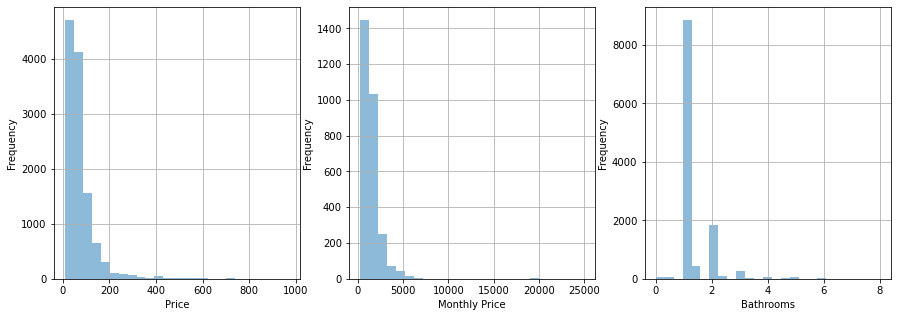

In [98]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Price'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
plt.xlabel('Price')

plt.subplot(1,3,2)
df['Monthly Price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Monthly Price')

plt.subplot(1,3,3)
df['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bathrooms')

plt.show()

Text(0.5, 0, 'Review Scores Rating')

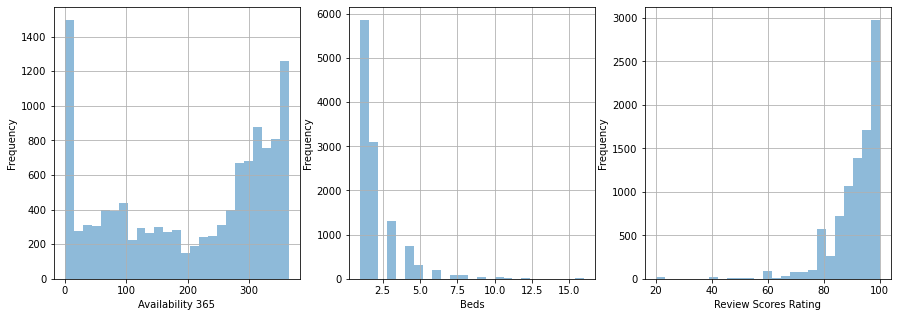

In [99]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Availability 365'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
plt.xlabel('Availability 365')

plt.subplot(1,3,2)
df['Beds'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Beds')

plt.subplot(1,3,3)
df['Review Scores Rating'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Review Scores Rating')

Podemos plotear la variable Precio en funcion de Bedrooms y otras. Se comprueba una cierta correlación entre sq feet y monthly price, pero no así con Bedrooms, al menos no tan clara.

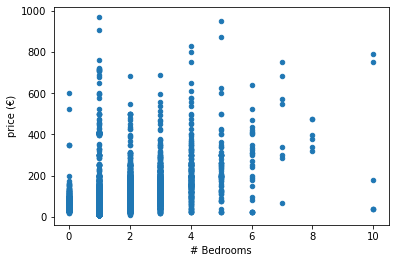

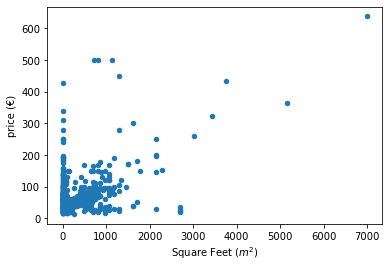

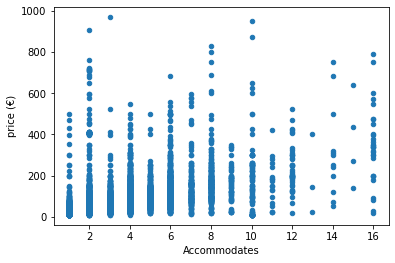

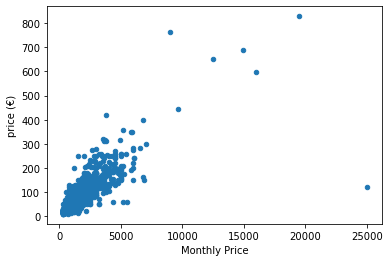

In [100]:
df.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# Bedrooms')
plt.ylabel('price (€)')
plt.show()

df.plot(kind = 'scatter',x='Square Feet',y = 'Price')
plt.xlabel('Square Feet ($m^2$)')
plt.ylabel('price (€)')
plt.show()

df.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.xlabel('Accommodates')
plt.ylabel('price (€)')
plt.show()

df.plot(kind = 'scatter',x='Monthly Price',y = 'Price')
plt.xlabel('Monthly Price')
plt.ylabel('price (€)')
plt.show()

# house_data.boxplot(by='waterfront',column = 'price')

plt.show()

In [101]:
df

,Host Since,Host Response Time,Host Response Rate,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,State,Zipcode,Market,Smart Location,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features
0,2015-04-13,within a few hours,100.0,2.0,Jerónimos,Retiro,Comunidad de Madrid,28014,Madrid,"Madrid, Spain",...,9.0,10.0,10.0,10.0,10.0,9.0,moderate,2.0,0.50,"Host Has Profile Pic,Is Location Exact,Require..."
1,2016-07-22,within an hour,100.0,1.0,Sol,Centro,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",...,9.0,9.0,10.0,10.0,10.0,10.0,flexible,1.0,2.43,"Host Has Profile Pic,Host Identity Verified,Re..."
2,2016-07-17,within an hour,100.0,16.0,Vista Alegre,Carabanchel,Comunidad de Madrid,28025,Madrid,"Madrid, Spain",...,NaN,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"Host Has Profile Pic,Host Identity Verified,Is..."
3,2014-05-08,within a few hours,100.0,114.0,Embajadores,Centro,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",...,NaN,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"Host Has Profile Pic,Requires License"
4,2012-02-06,within an hour,100.0,2.0,Gaztambide,Chamberí,28,28015,Madrid,"Madrid, Spain",...,9.0,9.0,9.0,10.0,9.0,9.0,strict,2.0,2.08,"Host Has Profile Pic,Host Identity Verified,Is..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,2017-03-26,within an hour,100.0,1.0,Argüelles,Moncloa - Aravaca,Comunidad de Madrid,28008,Madrid,"Madrid, Spain",...,NaN,NaN,NaN,NaN,NaN,NaN,moderate,1.0,NaN,"Host Has Profile Pic,Host Identity Verified,Is..."
11820,2015-04-05,within an hour,100.0,2.0,Aluche,Latina,Comunidad de Madrid,28047,Madrid,"Madrid, Spain",...,9.0,9.0,9.0,10.0,9.0,9.0,strict,1.0,2.92,"Host Has Profile Pic,Host Identity Verified,Is..."
11821,2016-04-08,within an hour,100.0,1.0,Palacio,Centro,Comunidad de Madrid,28013,Madrid,"Madrid, Spain",...,10.0,9.0,10.0,10.0,10.0,10.0,strict,1.0,2.06,"Host Is Superhost,Host Has Profile Pic,Host Id..."
11822,2016-06-15,within an hour,100.0,1.0,Palacio,Centro,Comunidad de Madrid,28005,Madrid,"Madrid, Spain",...,10.0,10.0,10.0,10.0,10.0,10.0,strict,1.0,3.39,"Host Is Superhost,Host Has Profile Pic,Is Loca..."


Pasamos a tratar las variables temporales que sí creemos que tienen significado, que son 'Host Since', 'First Review' y 'Last Review'.

Lo que hacemos con ellas son tres cosas:

1 - Rellenamos los valores nan con la moda;  
2 - Las casteamos a un tipo datetime;  
3 - Las transformamos en año, del que restamos 2009

In [102]:
from datetime import datetime

In [103]:
df['Host Since'].value_counts()

2016-01-12    148
2014-09-19    122
2013-03-21    104
2014-05-08     86
2013-09-16     64
             ... 
2012-09-29      1
2010-10-27      1
2014-12-13      1
2010-01-29      1
2011-12-17      1
Name: Host Since, Length: 2043, dtype: int64

In [104]:
df[df['Host Since'].isna()]

,Host Since,Host Response Time,Host Response Rate,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,State,Zipcode,Market,Smart Location,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features
61,NaN,NaN,NaN,NaN,Castillejos,Tetuán,Comunidad de Madrid,28020,Madrid,"Madrid, Spain",...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"Is Location Exact,Requires License"
5970,NaN,NaN,NaN,NaN,Vallehermoso,Chamberí,Comunidad de Madrid,28003,Madrid,"Madrid, Spain",...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"Is Location Exact,Requires License"
9510,NaN,NaN,NaN,NaN,San Diego,Puente de Vallecas,Comunidad de Madrid,28053,Madrid,"Madrid, Spain",...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,Requires License


In [105]:
df['Host Since'].fillna(df['Host Since'].mode()[0], inplace=True)

In [106]:
df[df['Host Since'].isna()]

,Host Since,Host Response Time,Host Response Rate,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,State,Zipcode,Market,Smart Location,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features


In [107]:
df['Host Since'] = df['Host Since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
df.head().T

,0,1,2,3,4
Host Since,2015-04-13 00:00:00,2016-07-22 00:00:00,2016-07-17 00:00:00,2014-05-08 00:00:00,2012-02-06 00:00:00
Host Response Time,within a few hours,within an hour,within an hour,within a few hours,within an hour
Host Response Rate,100,100,100,100,100
Host Total Listings Count,2,1,16,114,2
Neighbourhood Cleansed,Jerónimos,Sol,Vista Alegre,Embajadores,Gaztambide
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí
State,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,28
Zipcode,28014,28012,28025,28012,28015
Market,Madrid,Madrid,Madrid,Madrid,Madrid
Smart Location,"Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain"


In [108]:
df['Host Since'] = df['Host Since'].apply(lambda x: x.year - 2007)

In [109]:
df['Host Since'].value_counts()

8     2710
9     2541
7     2134
6     1700
5     1528
10     584
4      494
3      124
2        9
Name: Host Since, dtype: int64

In [110]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Host Since,8,9,9,7,5,7,5,7,5,4,9,4,7,8,5,8,9,6,6,7
Host Response Time,within a few hours,within an hour,within an hour,within a few hours,within an hour,within an hour,within a few hours,within a few hours,within an hour,within an hour,within an hour,within an hour,within a few hours,within a day,within an hour,within an hour,NaN,within an hour,within a few hours,within an hour
Host Response Rate,100,100,100,100,100,100,100,100,97,100,100,89,100,79,100,100,NaN,100,100,100
Host Total Listings Count,2,1,16,114,2,1,1,114,68,28,4,8,2,2,4,1,2,1,5,6
Neighbourhood Cleansed,Jerónimos,Sol,Vista Alegre,Embajadores,Gaztambide,Embajadores,Palacio,Sol,Calvià,Goya,Embajadores,Fuente del Berro,Ibiza,Embajadores,Casa de Campo,Embajadores,Ibiza,Embajadores,Palacio,Embajadores
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí,Centro,Centro,Centro,NaN,Salamanca,Centro,Salamanca,Retiro,Centro,Moncloa - Aravaca,Centro,Retiro,Centro,Centro,Centro
State,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,28,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Illes Balears,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Community of Madrid
Zipcode,28014,28012,28025,28012,28015,28012,28005,28013,07181,28006,28012,28028,28009,28012,28008,28012,28009,28012,28005,28012
Market,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Mallorca Island,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid
Smart Location,"Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Illetes, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain"


In [111]:
df['First Review'].fillna(df['First Review'].mode()[0], inplace=True)

In [112]:
df['Last Review'].fillna(df['Last Review'].mode()[0], inplace=True)

In [113]:
df['First Review'] = df['First Review'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [114]:
df['Last Review'] = df['Last Review'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [115]:
df['Last Review'] = df['Last Review'].apply(lambda x: x.year - 2007)

In [116]:
df['First Review'] = df['First Review'].apply(lambda x: x.year - 2007)

In [117]:
df.head().T

,0,1,2,3,4
Host Since,8,9,9,7,5
Host Response Time,within a few hours,within an hour,within an hour,within a few hours,within an hour
Host Response Rate,100,100,100,100,100
Host Total Listings Count,2,1,16,114,2
Neighbourhood Cleansed,Jerónimos,Sol,Vista Alegre,Embajadores,Gaztambide
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí
State,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,28
Zipcode,28014,28012,28025,28012,28015
Market,Madrid,Madrid,Madrid,Madrid,Madrid
Smart Location,"Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain"


Pasamos a eliminar, con prudencia, los outliers más notorios, para ello hacemos un describe().

In [118]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Since,11824.0,7.233846,1.643896,2.000000,6.000000,7.000000,9.000000,10.000000
Host Response Rate,10317.0,94.803722,15.247078,0.000000,100.000000,100.000000,100.000000,100.000000
Host Total Listings Count,11821.0,12.754420,34.578895,0.000000,1.000000,2.000000,6.000000,519.000000
Latitude,11824.0,40.491628,4.701030,-37.851182,40.409758,40.419331,40.430778,55.966912
Longitude,11824.0,-3.776863,14.014695,-123.124429,-3.707538,-3.700763,-3.683917,153.371427
Accommodates,11824.0,3.277486,2.093973,1.000000,2.000000,3.000000,4.000000,16.000000
Bathrooms,11780.0,1.285229,0.664691,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,11804.0,1.344290,0.905180,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,11787.0,2.049122,1.623489,1.000000,1.000000,2.000000,2.000000,16.000000
Square Feet,474.0,396.489451,671.125823,0.000000,0.000000,90.000000,624.000000,6997.000000


Parece claro que en 'Maximum Nights' y 'Minimum Nights' hay outliers, luego eliminamos las filas con valores por encima de 2000 y 99, respectivamente, que afectan a pocas muestras realmente.

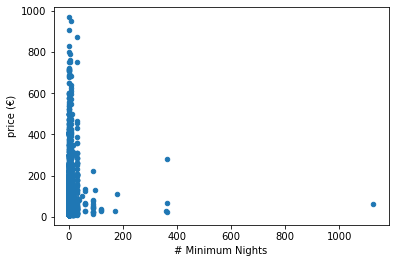

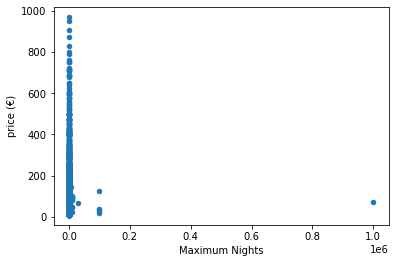

In [119]:
df.plot(kind = 'scatter',x='Minimum Nights',y = 'Price')
plt.xlabel('# Minimum Nights')
plt.ylabel('price (€)')
plt.show()

df.plot(kind = 'scatter',x='Maximum Nights',y = 'Price')
plt.xlabel('Maximum Nights')
plt.ylabel('price (€)')
plt.show()


# house_data.boxplot(by='waterfront',column = 'price')

plt.show()

In [120]:
df.loc[df['Minimum Nights'] > 99]

,Host Since,Host Response Time,Host Response Rate,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,State,Zipcode,Market,Smart Location,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features
1017,7,within an hour,98.0,46.0,Puerta del Angel,Latina,Comunidad de Madrid,28011,Madrid,"Madrid, Spain",...,NaN,NaN,NaN,NaN,NaN,NaN,moderate,44.0,0.08,"Host Has Profile Pic,Host Identity Verified,Is..."
3120,9,NaN,NaN,1.0,Palacio,Centro,Comunidad de Madrid,28005,Madrid,"Madrid, Spain",...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1.0,0.14,"Host Has Profile Pic,Requires License,Instant ..."
3322,6,NaN,NaN,1.0,Palos de Moguer,Arganzuela,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",...,8.0,8.0,9.0,9.0,9.0,8.0,moderate,1.0,0.39,"Host Has Profile Pic,Is Location Exact,Require..."
5652,8,NaN,NaN,1.0,Palomeras Sureste,Puente de Vallecas,Comunidad de Madrid,28038,Madrid,"Madrid, Spain",...,9.0,9.0,10.0,10.0,9.0,9.0,strict,1.0,1.29,"Host Has Profile Pic,Requires License"
6332,9,within an hour,100.0,3.0,Pacífico,Retiro,Community of Madrid,NaN,Madrid,"Madrid, Spain",...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,3.0,NaN,"Host Has Profile Pic,Host Identity Verified,Re..."
8024,7,NaN,NaN,2.0,Embajadores,Centro,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",...,10.0,10.0,10.0,10.0,10.0,10.0,moderate,2.0,2.25,"Host Is Superhost,Host Has Profile Pic,Is Loca..."
8480,7,NaN,NaN,1.0,Almendrales,Usera,Community of Madrid,28026,Madrid,"Madrid, Spain",...,9.0,10.0,9.0,10.0,10.0,10.0,strict,1.0,0.20,"Host Has Profile Pic,Is Location Exact,Require..."
8595,7,NaN,NaN,2.0,Cuatro Caminos,Tetuán,Comunidad de Madrid,28003,Madrid,"Madrid, Spain",...,NaN,NaN,NaN,NaN,NaN,NaN,strict,1.0,NaN,"Host Has Profile Pic,Requires License"
10134,3,within a few hours,100.0,7.0,Castellana,Salamanca,Madrid,28006,Madrid,"Madrid, Spain",...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,4.0,NaN,"Host Has Profile Pic,Is Location Exact,Require..."
10448,5,NaN,NaN,1.0,Palacio,Centro,Community of Madrid,28013,Madrid,"Madrid, Spain",...,8.0,6.0,10.0,10.0,10.0,8.0,strict,1.0,0.25,"Host Has Profile Pic,Is Location Exact,Require..."


In [121]:
df.loc[df['Maximum Nights'] > 2000]

,Host Since,Host Response Time,Host Response Rate,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,State,Zipcode,Market,Smart Location,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features
115,5,within an hour,100.0,32.0,Trafalgar,Chamberí,Community of Madrid,28010,Madrid,"Madrid, Spain",...,9.0,9.0,10.0,10.0,9.0,9.0,strict,25.0,0.26,"Host Has Profile Pic,Is Location Exact,Require..."
648,5,within an hour,100.0,4.0,Recoletos,Salamanca,Comunidad de Madrid,28001,Madrid,"Madrid, Spain",...,10.0,10.0,10.0,10.0,10.0,9.0,moderate,4.0,0.62,"Host Has Profile Pic,Host Identity Verified,Is..."
1651,7,within an hour,100.0,6.0,Palacio,Centro,Comunidad de Madrid,28013,Madrid,"Madrid, Spain",...,9.0,9.0,10.0,10.0,10.0,9.0,strict,6.0,0.90,"Host Has Profile Pic,Host Identity Verified,Is..."
1935,5,within a few hours,100.0,4.0,Cármenes,Latina,Madrid,28047,Madrid,"Madrid, Spain",...,10.0,7.0,9.0,9.0,8.0,9.0,flexible,4.0,0.39,"Host Has Profile Pic,Host Identity Verified,Is..."
1986,8,within an hour,100.0,4.0,Embajadores,Centro,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",...,10.0,10.0,10.0,10.0,9.0,10.0,strict,4.0,5.01,"Host Is Superhost,Host Has Profile Pic,Host Id..."
2077,6,within an hour,100.0,6.0,Cortes,Centro,Comunidad de Madrid,28014,Madrid,"Madrid, Spain",...,10.0,10.0,10.0,9.0,10.0,9.0,strict,6.0,3.00,"Host Has Profile Pic,Host Identity Verified,Is..."
2331,9,within an hour,100.0,2.0,Palacio,Centro,Comunidad de Madrid,28013,Madrid,"Madrid, Spain",...,10.0,10.0,10.0,10.0,10.0,10.0,strict,2.0,2.48,"Host Is Superhost,Host Has Profile Pic,Host Id..."
3138,8,within an hour,100.0,8.0,Justicia,Centro,Comunidad de Madrid,28004,Madrid,"Madrid, Spain",...,10.0,10.0,10.0,10.0,10.0,10.0,flexible,7.0,3.43,"Host Is Superhost,Host Has Profile Pic,Host Id..."
3472,6,within an hour,96.0,10.0,Trafalgar,Chamberí,Comunidad de Madrid,28010,Madrid,"Madrid, Spain",...,10.0,10.0,9.0,9.0,10.0,9.0,moderate,10.0,1.29,"Host Has Profile Pic,Host Identity Verified,Is..."
4196,7,within an hour,100.0,6.0,Palacio,Centro,Comunidad de Madrid,28013,Madrid,"Madrid, Spain",...,NaN,NaN,NaN,NaN,NaN,NaN,strict,6.0,NaN,"Host Has Profile Pic,Host Identity Verified,Re..."


Almacenamos el dataset filtrado en uno llamado df_filtered

In [122]:
filter_Min_Nights = df['Minimum Nights'] < 99
df_filtered = df[filter_Min_Nights]

In [123]:
filter_Max_Nights = df_filtered['Maximum Nights'] < 2000
df_filtered = df_filtered[filter_Max_Nights]

Con total listing count hacemos lo mismo, con un máximo de 300.

In [124]:
df.loc[df['Host Total Listings Count'] > 300]

,Host Since,Host Response Time,Host Response Rate,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,State,Zipcode,Market,Smart Location,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features
8596,10,within a few hours,94.0,519.0,Ciudad Universitaria,Moncloa - Aravaca,La Habana,10100,Madrid,"La Habana, Cuba",...,NaN,NaN,NaN,NaN,NaN,NaN,strict,1.0,NaN,"Host Has Profile Pic,Host Identity Verified,In..."


In [125]:
filter_Listings = df_filtered['Host Total Listings Count'] < 300
df_filtered = df_filtered[filter_Listings]

Si miramos al campo 'Smart Location' vemos que hay más de 200 localizaciones diferentes

In [126]:
list_Smart_locations = df_filtered['Smart Location'].unique()

In [127]:
list_Smart_locations

array(['Madrid, Spain', 'Illetes, Spain', 'Etterbeek, Belgium',
       'Palma, Spain', 'Betlem, Spain', 'Paris, France', '马德里, Spain',
       'Rome, Italy', 'Bondi, Australia', 'Seattle, WA',
       'Los Angeles, CA', 'Sutton, United Kingdom', 'Barcelona, Spain',
       'Amsterdam, Netherlands', 'Dublin, Ireland', 'Berlin, Germany',
       'Santa Margalida, Spain', 'Petra, Spain', 'Pasadena, CA',
       'London, United Kingdom', 'Can Picafort, Spain',
       'Santa Maria del Camí, Spain', 'Llucmajor, Spain',
       'København, Denmark', 'Brooklyn , NY', 'Darlinghurst, Australia',
       'Sant Llorenç des Cardassar, Spain', 'Washington, DC',
       'Edinburgh, United Kingdom', 'Chicago, IL',
       'Chelsea, London, United Kingdom', 'Sencelles, Spain',
       'Valldemossa, Spain', 'New York, NY', 'Manacor, Spain',
       'Roma, Italy', 'Vancouver, Canada', 'Brooklyn, NY',
       'Son Servera, Spain', 'Madrid, Comunidad de Madrid, ES, Spain',
       'Antwerpen, Belgium', 'Palma de Mallor

Lo ciero es que no nos parece posible hacer un modelo realmente eficaz con tantos lugares distintos. Incluso en Barcelona, con 233 entradas, éstas están divididas por barrios, lo que provoca que las muestras de cada uno sean muy escasas. Por ello, pensamos que lo más lógico es quedarnos solo con las filas de Madrid.

El siguiente código selecciona las filas de un smart location por encima de un determnado umbral, por lo que para escoger solo las de Madrid ponemos un valor muy alto, inferior a las entradas de la capital, como 10.000.

In [128]:
Min = 10000

Smart_Locations_Out = []

# df_filtered1 = df_filtered

for item in list_Smart_locations:
    
    df_aux = df_filtered[df_filtered['Smart Location'] == item]
    
    if df_aux.shape[0] < Min:
        
        df_filtered = df_filtered[df_filtered['Smart Location'] != item]
        
        Smart_Locations_Out = []
        

df_filtered['Smart Location'].value_counts()        
        
    
    

Madrid, Spain    10519
Name: Smart Location, dtype: int64

In [129]:
df_filtered.shape

(10519, 47)

In [130]:
df_filtered.head().T

,0,1,2,3,4
Host Since,8,9,9,7,5
Host Response Time,within a few hours,within an hour,within an hour,within a few hours,within an hour
Host Response Rate,100,100,100,100,100
Host Total Listings Count,2,1,16,114,2
Neighbourhood Cleansed,Jerónimos,Sol,Vista Alegre,Embajadores,Gaztambide
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí
State,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,28
Zipcode,28014,28012,28025,28012,28015
Market,Madrid,Madrid,Madrid,Madrid,Madrid
Smart Location,"Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain"


Ahora que todas las entradas son de Madrid, no tiene sentido conservar la columna de State.

Si se nos olvidó eliminar la de 'Calendar Updated' lo hacemos ahora.

In [131]:
df_filtered = df_filtered.drop(['State'], axis = 1)

In [132]:
# df_filtered = df_filtered.drop(['Calendar Updated'], axis = 1)

In [133]:
df_filtered.head().T

,0,1,2,3,4
Host Since,8,9,9,7,5
Host Response Time,within a few hours,within an hour,within an hour,within a few hours,within an hour
Host Response Rate,100,100,100,100,100
Host Total Listings Count,2,1,16,114,2
Neighbourhood Cleansed,Jerónimos,Sol,Vista Alegre,Embajadores,Gaztambide
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí
Zipcode,28014,28012,28025,28012,28015
Market,Madrid,Madrid,Madrid,Madrid,Madrid
Smart Location,"Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain"
Latitude,40.4077,40.4158,40.389,40.4128,40.4386


In [134]:
df_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Since,10519.0,7.300029,1.623859,2.000000,6.000000,8.000000,9.000000,10.000000
Host Response Rate,9218.0,94.800933,15.309918,0.000000,100.000000,100.000000,100.000000,100.000000
Host Total Listings Count,10519.0,10.002472,28.016334,0.000000,1.000000,2.000000,5.000000,265.000000
Latitude,10519.0,40.420452,0.019816,40.332908,40.410092,40.418471,40.427683,40.514247
Longitude,10519.0,-3.697132,0.023267,-3.835498,-3.707764,-3.701574,-3.693880,-3.575142
Accommodates,10519.0,3.186425,1.986105,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,10479.0,1.256990,0.608791,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,10501.0,1.294067,0.830944,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,10482.0,1.990269,1.524754,1.000000,1.000000,1.000000,2.000000,16.000000
Square Feet,408.0,370.147059,556.119075,0.000000,0.000000,90.000000,629.500000,5167.000000


Con gran dolor de corazón, llega elmomento de eliminar columnas que hemos visto están correlacionadas con la variable objetivo Price, pero que contienen demasiados valores nulos: Square Feet, Weekly Price y Monthly Price

In [135]:
df_filtered = df_filtered.drop(['Square Feet', 'Weekly Price', 'Monthly Price'], axis = 1)

In [136]:
df_filtered

,Host Since,Host Response Time,Host Response Rate,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,Market,Smart Location,Latitude,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features
0,8,within a few hours,100.0,2.0,Jerónimos,Retiro,28014,Madrid,"Madrid, Spain",40.407732,...,9.0,10.0,10.0,10.0,10.0,9.0,moderate,2.0,0.50,"Host Has Profile Pic,Is Location Exact,Require..."
1,9,within an hour,100.0,1.0,Sol,Centro,28012,Madrid,"Madrid, Spain",40.415802,...,9.0,9.0,10.0,10.0,10.0,10.0,flexible,1.0,2.43,"Host Has Profile Pic,Host Identity Verified,Re..."
2,9,within an hour,100.0,16.0,Vista Alegre,Carabanchel,28025,Madrid,"Madrid, Spain",40.389048,...,NaN,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"Host Has Profile Pic,Host Identity Verified,Is..."
3,7,within a few hours,100.0,114.0,Embajadores,Centro,28012,Madrid,"Madrid, Spain",40.412814,...,NaN,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"Host Has Profile Pic,Requires License"
4,5,within an hour,100.0,2.0,Gaztambide,Chamberí,28015,Madrid,"Madrid, Spain",40.438631,...,9.0,9.0,9.0,10.0,9.0,9.0,strict,2.0,2.08,"Host Has Profile Pic,Host Identity Verified,Is..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,10,within an hour,100.0,1.0,Argüelles,Moncloa - Aravaca,28008,Madrid,"Madrid, Spain",40.430559,...,NaN,NaN,NaN,NaN,NaN,NaN,moderate,1.0,NaN,"Host Has Profile Pic,Host Identity Verified,Is..."
11820,8,within an hour,100.0,2.0,Aluche,Latina,28047,Madrid,"Madrid, Spain",40.391126,...,9.0,9.0,9.0,10.0,9.0,9.0,strict,1.0,2.92,"Host Has Profile Pic,Host Identity Verified,Is..."
11821,9,within an hour,100.0,1.0,Palacio,Centro,28013,Madrid,"Madrid, Spain",40.416271,...,10.0,9.0,10.0,10.0,10.0,10.0,strict,1.0,2.06,"Host Is Superhost,Host Has Profile Pic,Host Id..."
11822,9,within an hour,100.0,1.0,Palacio,Centro,28005,Madrid,"Madrid, Spain",40.413397,...,10.0,10.0,10.0,10.0,10.0,10.0,strict,1.0,3.39,"Host Is Superhost,Host Has Profile Pic,Is Loca..."


Bien, lo que toca ahora es rellenar los valores que son nan en las variables numéricas. Quizás sea una fribolité, pero hemos diferenciado en cierto modo entre las variables realmente continuas, que rellenamos sus valores con la media, y aquellas más discretas, como Bedrooms, con números enteros, en las que tomamos la moda.

In [137]:
FillNA_num_mean = ['Security Deposit', 'Cleaning Fee', 'Reviews per Month', 'Review Scores Rating', 'Review Scores Accuracy',
          'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location',
         'Review Scores Value', 'Calculated host listings count', 'Host Response Rate', 'Latitude', 
                  'Longitude', 'Bathrooms', 'Bedrooms', 'Beds']

In [138]:
FillNA_num_mode = ['Host Since', 'First Review', 'Last Review', 'Guests Included',
                  'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30', 
                   'Availability 60', 'Availability 90', 'Availability 365', 'Number of Reviews', 'Host Total Listings Count']

In [139]:

for item in FillNA_num_mean:
    
    
    df_filtered[item].fillna(df_filtered[item].mean(), inplace=True)


In [140]:
for item in FillNA_num_mode:
    
    
    df_filtered[item].fillna(df_filtered[item].mode()[0], inplace=True)

In [141]:
df_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Since,10519.0,7.300029,1.623859,2.000000,6.000000,8.000000,9.000000,10.000000
Host Response Rate,10519.0,94.800933,14.331811,0.000000,94.800933,100.000000,100.000000,100.000000
Host Total Listings Count,10519.0,10.002472,28.016334,0.000000,1.000000,2.000000,5.000000,265.000000
Latitude,10519.0,40.420452,0.019816,40.332908,40.410092,40.418471,40.427683,40.514247
Longitude,10519.0,-3.697132,0.023267,-3.835498,-3.707764,-3.701574,-3.693880,-3.575142
Accommodates,10519.0,3.186425,1.986105,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,10519.0,1.256990,0.607632,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,10519.0,1.294067,0.830233,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,10519.0,1.990269,1.522070,1.000000,1.000000,1.990269,2.000000,16.000000
Price,10511.0,66.191609,56.198137,9.000000,31.000000,53.000000,80.000000,875.000000


Repasamos las variables que no son numéricas con un .dtypes

In [142]:
df_filtered.dtypes

Host Since                          int64
Host Response Time                 object
Host Response Rate                float64
Host Total Listings Count         float64
Neighbourhood Cleansed             object
Neighbourhood Group Cleansed       object
Zipcode                            object
Market                             object
Smart Location                     object
Latitude                          float64
Longitude                         float64
Property Type                      object
Room Type                          object
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Bed Type                           object
Price                             float64
Security Deposit                  float64
Cleaning Fee                      float64
Guests Included                     int64
Extra People                        int64
Minimum Nights                    

Tomamos ahora las columnas no númericas y las categorizamos con mean, e incorporamos en el fillna para rellenarlos.

In [143]:
df_filtered['Host Response Time'].unique()

array(['within a few hours', 'within an hour', 'within a day', nan,
       'a few days or more'], dtype=object)

In [144]:
df_filtered['Neighbourhood Cleansed'].isna().any()

False

In [145]:
categorical = ['Host Response Time', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Zipcode', 'Market', 
               'Smart Location', 'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy', 'Features' ]

In [146]:
for c in categorical:
    df_filtered[c].fillna(df_filtered[c].mode()[0], inplace=True)

In [147]:
mean_map1 = {}
for c in categorical:
    
    # df_filtered[c].fillna(df_filtered[c].mode()[0], inplace=True)
    
    mean = df_filtered.groupby(c)['Price'].mean()
    df_filtered[c] = df_filtered[c].map(mean)    
    mean_map1[c] = mean

In [148]:
mean_map1

{'Host Response Time': Host Response Time
 a few days or more    73.117925
 within a day          59.684853
 within a few hours    69.857278
 within an hour        66.014091
 Name: Price, dtype: float64,
 'Neighbourhood Cleansed': Neighbourhood Cleansed
 Abrantes        29.083333
 Acacias         44.891667
 Adelfas         52.900000
 Aeropuerto      30.600000
 Aguilas         23.666667
                   ...    
 Valverde        47.764706
 Ventas          31.189655
 Vinateros       40.300000
 Vista Alegre    37.074074
 Zofío           39.666667
 Name: Price, Length: 125, dtype: float64,
 'Neighbourhood Group Cleansed': Neighbourhood Group Cleansed
 Arganzuela               46.209779
 Barajas                  53.106061
 Carabanchel              39.954386
 Centro                   72.818806
 Chamartín                75.129496
 Chamberí                 72.479578
 Ciudad Lineal            44.954545
 Fuencarral - El Pardo    55.052632
 Hortaleza                50.000000
 Latina             

In [149]:
df_filtered.dtypes

Host Since                          int64
Host Response Time                float64
Host Response Rate                float64
Host Total Listings Count         float64
Neighbourhood Cleansed            float64
Neighbourhood Group Cleansed      float64
Zipcode                           float64
Market                            float64
Smart Location                    float64
Latitude                          float64
Longitude                         float64
Property Type                     float64
Room Type                         float64
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Bed Type                          float64
Price                             float64
Security Deposit                  float64
Cleaning Fee                      float64
Guests Included                     int64
Extra People                        int64
Minimum Nights                    

In [150]:
df_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Since,10519.0,7.300029,1.623859e+00,2.000000,6.000000,8.000000,9.000000,10.000000
Host Response Time,10519.0,66.193555,2.940372e+00,59.684853,66.014091,66.014091,66.014091,73.117925
Host Response Rate,10519.0,94.800933,1.433181e+01,0.000000,94.800933,100.000000,100.000000,100.000000
Host Total Listings Count,10519.0,10.002472,2.801633e+01,0.000000,1.000000,2.000000,5.000000,265.000000
Neighbourhood Cleansed,10519.0,66.204262,1.927610e+01,12.000000,55.666667,66.546875,79.451200,280.000000
Neighbourhood Group Cleansed,10519.0,66.198256,1.367955e+01,34.072165,55.052632,72.818806,72.818806,86.054775
Zipcode,10518.0,66.196114,1.639147e+01,18.000000,60.197452,66.966983,74.185472,250.000000
Market,10519.0,66.191573,2.013426e+00,35.000000,66.144721,66.144721,66.144721,148.666667
Smart Location,10519.0,66.191609,8.342168e-12,66.191609,66.191609,66.191609,66.191609,66.191609
Latitude,10519.0,40.420452,1.981584e-02,40.332908,40.410092,40.418471,40.427683,40.514247


In [151]:
df_filtered.shape

(10519, 43)

Ahora que tenemos todas las variables númericas, podemos ver el mosaico de correlaciones entre ellas.

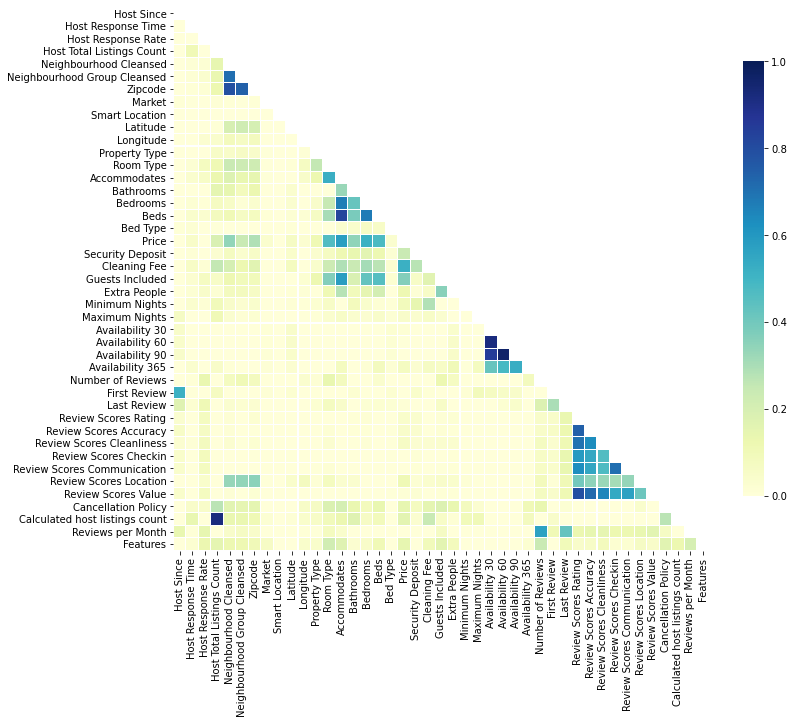

In [152]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df_filtered).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Lo cierto es que ya conocíamos la correlación entre los reviews, pero ya vimos que no era excesiva, así que pensamos que es mejor mantenerla. Por el contrario, en los availabilities, serís mejor eliminar o la 90 o la 60, e igual que en el caso de 'Calculated host listings count' y 'Host Total Listings Count'

In [153]:
df_filtered = df_filtered.drop(['Availability 90', 'Calculated host listings count'], axis = 1)

In [154]:
df_filtered.shape

(10519, 41)

Antes de añadir una serie de columnas que parece han resultado ser útiles en problemas parecidos, para mayor facilidad cuando tengamos que tratar el dataset de test, almacenamos las columnas que no hemos eliminado.

In [155]:
lista_columnas = list(df_filtered)

In [156]:
lista_columnas

['Host Since',
 'Host Response Time',
 'Host Response Rate',
 'Host Total Listings Count',
 'Neighbourhood Cleansed',
 'Neighbourhood Group Cleansed',
 'Zipcode',
 'Market',
 'Smart Location',
 'Latitude',
 'Longitude',
 'Property Type',
 'Room Type',
 'Accommodates',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Bed Type',
 'Price',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Availability 30',
 'Availability 60',
 'Availability 365',
 'Number of Reviews',
 'First Review',
 'Last Review',
 'Review Scores Rating',
 'Review Scores Accuracy',
 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Communication',
 'Review Scores Location',
 'Review Scores Value',
 'Cancellation Policy',
 'Reviews per Month',
 'Features']

Introducimos las columnas de dormitorios al cuadrado, dormitorios x baños, y longitud por latitud

In [157]:
df_filtered['Bedrooms_squared'] = df_filtered['Bedrooms'].apply(lambda x: x**2)
df_filtered['Bed_bath_rooms']   = df_filtered['Bedrooms']*df_filtered['Bathrooms']
df_filtered['Lat_plus_long']    = df_filtered['Latitude']*df_filtered['Longitude']

In [158]:
df_filtered.shape

(10519, 44)

In [159]:
df_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Since,10519.0,7.300029,1.623859e+00,2.000000,6.000000,8.000000,9.000000,10.000000
Host Response Time,10519.0,66.193555,2.940372e+00,59.684853,66.014091,66.014091,66.014091,73.117925
Host Response Rate,10519.0,94.800933,1.433181e+01,0.000000,94.800933,100.000000,100.000000,100.000000
Host Total Listings Count,10519.0,10.002472,2.801633e+01,0.000000,1.000000,2.000000,5.000000,265.000000
Neighbourhood Cleansed,10519.0,66.204262,1.927610e+01,12.000000,55.666667,66.546875,79.451200,280.000000
Neighbourhood Group Cleansed,10519.0,66.198256,1.367955e+01,34.072165,55.052632,72.818806,72.818806,86.054775
Zipcode,10518.0,66.196114,1.639147e+01,18.000000,60.197452,66.966983,74.185472,250.000000
Market,10519.0,66.191573,2.013426e+00,35.000000,66.144721,66.144721,66.144721,148.666667
Smart Location,10519.0,66.191609,8.342168e-12,66.191609,66.191609,66.191609,66.191609,66.191609
Latitude,10519.0,40.420452,1.981584e-02,40.332908,40.410092,40.418471,40.427683,40.514247


Misteriosamente hay dos elementos con un count inferior en uno al total. Los rellenamos.

In [160]:
df_filtered['Zipcode'].fillna(df_filtered['Zipcode'].mean(), inplace=True)
df_filtered['Neighbourhood Cleansed'].fillna(df_filtered['Neighbourhood Cleansed'].mean(), inplace=True)

In [161]:
df_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Since,10519.0,7.300029,1.623859e+00,2.000000,6.000000,8.000000,9.000000,10.000000
Host Response Time,10519.0,66.193555,2.940372e+00,59.684853,66.014091,66.014091,66.014091,73.117925
Host Response Rate,10519.0,94.800933,1.433181e+01,0.000000,94.800933,100.000000,100.000000,100.000000
Host Total Listings Count,10519.0,10.002472,2.801633e+01,0.000000,1.000000,2.000000,5.000000,265.000000
Neighbourhood Cleansed,10519.0,66.204262,1.927610e+01,12.000000,55.666667,66.546875,79.451200,280.000000
Neighbourhood Group Cleansed,10519.0,66.198256,1.367955e+01,34.072165,55.052632,72.818806,72.818806,86.054775
Zipcode,10519.0,66.196114,1.639069e+01,18.000000,60.197452,66.966983,74.185472,250.000000
Market,10519.0,66.191573,2.013426e+00,35.000000,66.144721,66.144721,66.144721,148.666667
Smart Location,10519.0,66.191609,8.342168e-12,66.191609,66.191609,66.191609,66.191609,66.191609
Latitude,10519.0,40.420452,1.981584e-02,40.332908,40.410092,40.418471,40.427683,40.514247


Finalmente nos quedamos con los registros que tienen un valor para el precio, que son casi todos, por otra parte.

In [162]:
df_filtered = df_filtered[df_filtered['Price'].notnull()]

In [163]:
df_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Since,10511.0,7.300257,1.623870e+00,2.000000,6.000000,8.000000,9.000000,10.000000
Host Response Time,10511.0,66.191609,2.939502e+00,59.684853,66.014091,66.014091,66.014091,73.117925
Host Response Rate,10511.0,94.816993,1.427713e+01,0.000000,94.800933,100.000000,100.000000,100.000000
Host Total Listings Count,10511.0,10.007040,2.802614e+01,0.000000,1.000000,2.000000,5.000000,265.000000
Neighbourhood Cleansed,10511.0,66.191609,1.926419e+01,12.000000,55.666667,66.546875,79.451200,280.000000
Neighbourhood Group Cleansed,10511.0,66.191609,1.368135e+01,34.072165,55.052632,72.818806,72.818806,86.054775
Zipcode,10511.0,66.191609,1.639437e+01,18.000000,60.197452,66.966983,74.185472,250.000000
Market,10511.0,66.191609,2.014192e+00,35.000000,66.144721,66.144721,66.144721,148.666667
Smart Location,10511.0,66.191609,8.342169e-12,66.191609,66.191609,66.191609,66.191609,66.191609
Latitude,10511.0,40.420450,1.982101e-02,40.332908,40.410091,40.418455,40.427682,40.514247


Ahora dividimos entre X e y en el train

In [164]:
y_train = df_filtered['Price']

In [165]:
X_train = df_filtered.drop(['Price'], axis = 1)

In [166]:
X_train

,Host Since,Host Response Time,Host Response Rate,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,Market,Smart Location,Latitude,...,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features,Bedrooms_squared,Bed_bath_rooms,Lat_plus_long
0,8,69.857278,100.0,2.0,104.600000,70.394886,83.416000,66.144721,66.191609,40.407732,...,10.000000,10.000000,10.000000,9.000000,62.961171,0.500000,60.726506,1.0,1.0,-148.895166
1,9,66.014091,100.0,1.0,85.851756,72.818806,66.966983,66.144721,66.191609,40.415802,...,10.000000,10.000000,10.000000,10.000000,57.307647,2.430000,67.550082,1.0,1.0,-149.754304
2,9,66.014091,100.0,16.0,37.074074,39.954386,38.376344,66.144721,66.191609,40.389048,...,9.625684,9.647395,9.546594,9.207396,62.961171,1.928632,78.656542,1.0,1.5,-151.070143
3,7,69.857278,100.0,114.0,60.683424,72.818806,66.966983,66.144721,66.191609,40.412814,...,9.625684,9.647395,9.546594,9.207396,76.301868,1.928632,56.136054,1.0,3.0,-149.650771
4,5,66.014091,100.0,2.0,56.127273,72.479578,61.771967,66.144721,66.191609,40.438631,...,9.000000,10.000000,9.000000,9.000000,76.301868,2.080000,67.218239,1.0,1.0,-150.177597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,10,66.014091,100.0,1.0,65.097674,66.011976,63.807273,66.144721,66.191609,40.430559,...,9.625684,9.647395,9.546594,9.207396,62.961171,1.928632,67.218239,4.0,2.0,-150.284732
11820,8,66.014091,100.0,2.0,29.114286,34.072165,31.979592,66.144721,66.191609,40.391126,...,9.000000,10.000000,9.000000,9.000000,76.301868,2.920000,67.218239,9.0,3.0,-151.631021
11821,9,66.014091,100.0,1.0,77.391504,72.818806,82.115816,66.144721,66.191609,40.416271,...,10.000000,10.000000,10.000000,10.000000,76.301868,2.060000,67.401361,1.0,1.0,-150.069354
11822,9,66.014091,100.0,1.0,77.391504,72.818806,67.832653,66.144721,66.191609,40.413397,...,10.000000,10.000000,10.000000,10.000000,76.301868,3.390000,73.120482,1.0,1.0,-149.985440


In [167]:
y_train

0        60.0
1        50.0
2        10.0
3        30.0
4        32.0
         ... 
11819    52.0
11820    55.0
11821    69.0
11822    69.0
11823    25.0
Name: Price, Length: 10511, dtype: float64

Lo siguiente, y no es nada fácil, es aplicar al dataset de Test los mismos cambios que hemosaplicado al de train.

### Tratamiento del Test

Cargamos el dataset de Test, y echamos un vistazo.

In [168]:
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

In [169]:
df_test.head().T

,0,1,2,3,4
ID,14732416,5302840,15241840,10881538,7317218
Listing Url,https://www.airbnb.com/rooms/14732416,https://www.airbnb.com/rooms/5302840,https://www.airbnb.com/rooms/15241840,https://www.airbnb.com/rooms/10881538,https://www.airbnb.com/rooms/7317218
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,Habitación privada en entorno tranquilo.,Habitación en calle Mayor,Lovely place for2 in the center of Madrid Cham...,Habitación cómoda bien comunicada!,buhardilla con encanto
...,...,...,...,...,...
Cancellation Policy,flexible,moderate,strict,moderate,flexible
Calculated host listings count,1,3,1,1,2
Reviews per Month,1.59,1.2,NaN,0.24,NaN
Geolocation,"40.3463197925,-3.69144006284","40.4144233958,-3.71284713904","40.4370117738,-3.6989874106","40.4079324297,-3.74453330612","40.4101071551,-3.70486859629"


In [170]:
df_test

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,14732416,https://www.airbnb.com/rooms/14732416,20170407214119,2017-04-08,Habitación privada en entorno tranquilo.,El edificio está junto a un maravilloso parque...,Me preocupo mucho de que el apartamento esté l...,El edificio está junto a un maravilloso parque...,none,"El barrio es multicultural, podrás encontrar q...",...,10.0,9.0,10.0,NaN,NaN,flexible,1.0,1.59,"40.3463197925,-3.69144006284","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,5302840,https://www.airbnb.com/rooms/5302840,20170407214119,2017-04-08,Habitación en calle Mayor,Es una habitación con entrada independiente. D...,La habitación está situada en un edificio de l...,Es una habitación con entrada independiente. D...,none,"La habitación está en la calle Mayor, en el ba...",...,10.0,10.0,10.0,NaN,NaN,moderate,3.0,1.20,"40.4144233958,-3.71284713904","Host Has Profile Pic,Host Identity Verified,Is..."
2,15241840,https://www.airbnb.com/rooms/15241840,20170407214119,2017-04-08,Lovely place for2 in the center of Madrid Cham...,Lovely place ideal for 2 (couple or 2 friends)...,"Lovely place in the heart of Madrid, in Chambe...",Lovely place ideal for 2 (couple or 2 friends)...,none,Quiet street in a animated district of Chamber...,...,NaN,NaN,NaN,NaN,NaN,strict,1.0,NaN,"40.4370117738,-3.6989874106","Host Has Profile Pic,Host Identity Verified,Re..."
3,10881538,https://www.airbnb.com/rooms/10881538,20170407214119,2017-04-08,Habitación cómoda bien comunicada!,Alquilo habitación al lado de casa de Campo (p...,"Habitación con cama de 90 cm, con una supletor...",Alquilo habitación al lado de casa de Campo (p...,none,Tranquilo,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,0.24,"40.4079324297,-3.74453330612","Host Has Profile Pic,Host Identity Verified,Re..."
4,7317218,https://www.airbnb.com/rooms/7317218,20170407214119,2017-04-08,buhardilla con encanto,"En pleno centro de madrid,coqueta buahardilla ...",NaN,"En pleno centro de madrid,coqueta buahardilla ...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,2.0,NaN,"40.4101071551,-3.70486859629","Host Has Profile Pic,Requires License"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,15939050,https://www.airbnb.com/rooms/15939050,20170304065726,2017-03-05,Habitacion single confortable,Zona muy comercial y bien comunicado con el ce...,NaN,Zona muy comercial y bien comunicado con el ce...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,3.0,NaN,"51.4083394941,-0.124776678767","Host Has Profile Pic,Host Identity Verified,In..."
2952,779960,https://www.airbnb.com/rooms/779960,20170407214119,2017-04-08,New loft close to museums Free wifi,Awake in this sunny and cozy apartment close t...,This brand new apartment with two outdoor balc...,Awake in this sunny and cozy apartment close t...,none,This neighborhood is one of the most ancient a...,...,10.0,9.0,10.0,NaN,NaN,strict,1.0,2.02,"40.4080307032,-3.6985459634","Host Has Profile Pic,Host Identity Verified,Re..."
2953,11277200,https://www.airbnb.com/rooms/11277200,20170407214119,2017-04-08,Acogedora y espaciosa habitacion.,Esta confortable habitacion esta ubicada en e...,Su ubicacion y facil acceso.,Esta confortable habitacion esta ubicada en e...,none,"Es un barrio con mucha actividad comercial, mu...",...,10.0,9.0,10.0,NaN,NaN,flexible,2.0,1.53,"40.3861889364,-3.73122902244","Host Has Profile Pic,Requires License"
2954,15785030,https://www.airbnb.com/rooms/15785030,20170407214119,2017-04-08,PUERTA DEL SOL - CENTER MADRID *PARKING OPTIONAL,"Places of interest: Puerta del Sol, Plaza Mayo...",The apartment is located at 270 meters from th...,"Places of interest: Puerta del Sol, Plaza Mayo...",none,Great variety of entertainment in the heart of...,...,10.0,

El primer cambio fundamental es quitar las mismas columnas que hemos quitado en train, y para ello aprovechamos la lista columnas que almacenamos antes.

In [171]:
df_test = df_test[lista_columnas]

In [172]:
df_test

,Host Since,Host Response Time,Host Response Rate,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,Market,Smart Location,Latitude,...,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features
0,2016-05-30,within an hour,100.0,1.0,Los Rosales,Villaverde,28021,Madrid,"Madrid, Spain",40.346320,...,100.0,10.0,10.0,10.0,10.0,9.0,10.0,flexible,1.59,"Host Is Superhost,Host Has Profile Pic,Host Id..."
1,2015-02-09,within an hour,100.0,3.0,Palacio,Centro,28013,Madrid,"Madrid, Spain",40.414423,...,96.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,1.20,"Host Has Profile Pic,Host Identity Verified,Is..."
2,2012-09-04,within a few hours,80.0,1.0,Almagro,Chamberí,28010,Madrid,"Madrid, Spain",40.437012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,NaN,"Host Has Profile Pic,Host Identity Verified,Re..."
3,2015-06-01,NaN,NaN,1.0,Lucero,Latina,28011,Madrid,"Madrid, Spain",40.407932,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,0.24,"Host Has Profile Pic,Host Identity Verified,Re..."
4,2015-07-13,NaN,NaN,2.0,Embajadores,Centro,28012,Madrid,"Madrid, Spain",40.410107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,NaN,"Host Has Profile Pic,Requires License"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,2016-11-12,within an hour,100.0,3.0,Croydon,NaN,SW16 4BL,London,"Londres, United Kingdom",51.408339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,NaN,"Host Has Profile Pic,Host Identity Verified,In..."
2952,2012-11-10,within an hour,100.0,3.0,Embajadores,Centro,28012,Madrid,"Madrid, Spain",40.408031,...,95.0,10.0,10.0,10.0,10.0,9.0,10.0,strict,2.02,"Host Has Profile Pic,Host Identity Verified,Re..."
2953,2016-02-15,within an hour,100.0,2.0,Puerta Bonita,Carabanchel,28025,Madrid,"Madrid, Spain",40.386189,...,95.0,10.0,10.0,10.0,10.0,9.0,10.0,flexible,1.53,"Host Has Profile Pic,Requires License"
2954,2014-10-17,within an hour,100.0,1.0,Sol,Centro,28012,Madrid,"Madrid, Spain",40.416195,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,4.20,"Host Has Profile Pic,Is Location Exact,Require..."


El siguiente paso es modificar las columnas de fechas que sí consideramos importantes, de la misma forma que hicimos en train.

In [173]:
df_test['Host Since'].fillna(df_test['Host Since'].mode()[0], inplace=True)
df_test['Host Since'] = df_test['Host Since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
df_test['Host Since'] = df_test['Host Since'].apply(lambda x: x.year - 2007)

In [174]:
df_test['First Review'].fillna(df_test['First Review'].mode()[0], inplace=True)
df_test['First Review'] = df_test['First Review'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
df_test['First Review'] = df_test['First Review'].apply(lambda x: x.year - 2007)

In [175]:
df_test['Last Review'].fillna(df_test['Last Review'].mode()[0], inplace=True)
df_test['Last Review'] = df_test['Last Review'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
df_test['Last Review'] = df_test['Last Review'].apply(lambda x: x.year - 2007)

In [176]:
df_test.dtypes

Host Since                        int64
Host Response Time               object
Host Response Rate              float64
Host Total Listings Count       float64
Neighbourhood Cleansed           object
Neighbourhood Group Cleansed     object
Zipcode                          object
Market                           object
Smart Location                   object
Latitude                        float64
Longitude                       float64
Property Type                    object
Room Type                        object
Accommodates                      int64
Bathrooms                       float64
Bedrooms                        float64
Beds                            float64
Bed Type                         object
Price                           float64
Security Deposit                float64
Cleaning Fee                    float64
Guests Included                   int64
Extra People                      int64
Minimum Nights                    int64
Maximum Nights                    int64


Aplicamos los mismos filtros que en train

In [177]:
filter_Min_Nights = df_test['Minimum Nights'] < 99
df_test_filtered = df_test[filter_Min_Nights]

In [178]:
filter_Max_Nights = df_test_filtered['Maximum Nights'] < 2000
df_test_filtered = df_test_filtered[filter_Max_Nights]

In [179]:
filter_Listings = df_test_filtered['Host Total Listings Count'] < 300
df_test_filtered = df_test_filtered[filter_Listings]

Nos quedamos también con los registros de Madrid, Spain.

In [180]:
filter_Smart = df_test_filtered['Smart Location'] == 'Madrid, Spain'
df_test_filtered = df_test_filtered[filter_Smart]

In [181]:
df_test_filtered.dtypes

Host Since                        int64
Host Response Time               object
Host Response Rate              float64
Host Total Listings Count       float64
Neighbourhood Cleansed           object
Neighbourhood Group Cleansed     object
Zipcode                          object
Market                           object
Smart Location                   object
Latitude                        float64
Longitude                       float64
Property Type                    object
Room Type                        object
Accommodates                      int64
Bathrooms                       float64
Bedrooms                        float64
Beds                            float64
Bed Type                         object
Price                           float64
Security Deposit                float64
Cleaning Fee                    float64
Guests Included                   int64
Extra People                      int64
Minimum Nights                    int64
Maximum Nights                    int64


In [182]:
df_test_filtered['Smart Location'].value_counts()

Madrid, Spain    2629
Name: Smart Location, dtype: int64

Llevamos a cabo el mismo procedimiento para rellenar los valores son nulos en las variables numéricas.

In [183]:
FillNA_num_mode = ['Host Since', 'First Review', 'Last Review', 'Guests Included',
                  'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30', 
                   'Availability 60', 'Availability 365', 'Number of Reviews', 'Host Total Listings Count']

In [184]:
for item in FillNA_num_mode:
    
    
    df_test_filtered[item].fillna(df_test_filtered[item].mode()[0], inplace=True)

In [185]:
df_test_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Since,2629.0,7.332826,1.634598,3.000000,6.000000,8.000000,9.000000,10.000000
Host Response Rate,2289.0,94.845784,15.130992,0.000000,100.000000,100.000000,100.000000,100.000000
Host Total Listings Count,2629.0,9.109167,25.998666,0.000000,1.000000,2.000000,5.000000,207.000000
Latitude,2629.0,40.420985,0.020934,40.331888,40.409975,40.419191,40.428168,40.513673
Longitude,2629.0,-3.697226,0.023674,-3.785982,-3.707873,-3.701634,-3.693554,-3.573613
Accommodates,2629.0,3.198174,1.996930,1.000000,2.000000,3.000000,4.000000,16.000000
Bathrooms,2620.0,1.235305,0.563692,0.000000,1.000000,1.000000,1.000000,6.500000
Bedrooms,2624.0,1.289634,0.797890,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,2617.0,1.955674,1.433658,1.000000,1.000000,2.000000,2.000000,16.000000
Price,2628.0,64.646119,54.047988,9.000000,30.000000,51.000000,80.000000,850.000000


In [186]:
FillNA_num_mean = ['Security Deposit', 'Cleaning Fee', 'Reviews per Month', 'Review Scores Rating', 'Review Scores Accuracy',
          'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location',
         'Review Scores Value', 'Host Response Rate', 'Latitude', 
                  'Longitude', 'Bathrooms', 'Bedrooms', 'Beds']

In [187]:
for item in FillNA_num_mean:
    
    
    df_test_filtered[item].fillna(df_test_filtered[item].mean(), inplace=True)
    

In [188]:
df_test_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Since,2629.0,7.332826,1.634598,3.000000,6.000000,8.000000,9.000000,10.000000
Host Response Rate,2629.0,94.845784,14.118311,0.000000,94.845784,100.000000,100.000000,100.000000
Host Total Listings Count,2629.0,9.109167,25.998666,0.000000,1.000000,2.000000,5.000000,207.000000
Latitude,2629.0,40.420985,0.020934,40.331888,40.409975,40.419191,40.428168,40.513673
Longitude,2629.0,-3.697226,0.023674,-3.785982,-3.707873,-3.701634,-3.693554,-3.573613
Accommodates,2629.0,3.198174,1.996930,1.000000,2.000000,3.000000,4.000000,16.000000
Bathrooms,2629.0,1.235305,0.562726,0.000000,1.000000,1.000000,1.000000,6.500000
Bedrooms,2629.0,1.289634,0.797131,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,2629.0,1.955674,1.430381,1.000000,1.000000,2.000000,2.000000,16.000000
Price,2628.0,64.646119,54.047988,9.000000,30.000000,51.000000,80.000000,850.000000


In [189]:
df_test_filtered.shape

(2629, 41)

Vamos con las variables objeto, repasamos que la lista de ellas, y el mapeo están ok.

In [190]:
categorical

['Host Response Time',
 'Neighbourhood Cleansed',
 'Neighbourhood Group Cleansed',
 'Zipcode',
 'Market',
 'Smart Location',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Cancellation Policy',
 'Features']

In [191]:
mean_map1

{'Host Response Time': Host Response Time
 a few days or more    73.117925
 within a day          59.684853
 within a few hours    69.857278
 within an hour        66.014091
 Name: Price, dtype: float64,
 'Neighbourhood Cleansed': Neighbourhood Cleansed
 Abrantes        29.083333
 Acacias         44.891667
 Adelfas         52.900000
 Aeropuerto      30.600000
 Aguilas         23.666667
                   ...    
 Valverde        47.764706
 Ventas          31.189655
 Vinateros       40.300000
 Vista Alegre    37.074074
 Zofío           39.666667
 Name: Price, Length: 125, dtype: float64,
 'Neighbourhood Group Cleansed': Neighbourhood Group Cleansed
 Arganzuela               46.209779
 Barajas                  53.106061
 Carabanchel              39.954386
 Centro                   72.818806
 Chamartín                75.129496
 Chamberí                 72.479578
 Ciudad Lineal            44.954545
 Fuencarral - El Pardo    55.052632
 Hortaleza                50.000000
 Latina             

Rellenamos en estas variables los nulos con la moda

In [192]:
for c in categorical:
    df_filtered[c].fillna(df_filtered[c].mode()[0], inplace=True)

Aplicamos el mapeo y comprobamos que ya todos las variables son numéricas

In [193]:
for c in categorical:
    df_test_filtered[c] = df_test_filtered[c].map(mean_map1[c])

In [194]:
df_test_filtered.dtypes

Host Since                        int64
Host Response Time              float64
Host Response Rate              float64
Host Total Listings Count       float64
Neighbourhood Cleansed          float64
Neighbourhood Group Cleansed    float64
Zipcode                         float64
Market                          float64
Smart Location                  float64
Latitude                        float64
Longitude                       float64
Property Type                   float64
Room Type                       float64
Accommodates                      int64
Bathrooms                       float64
Bedrooms                        float64
Beds                            float64
Bed Type                        float64
Price                           float64
Security Deposit                float64
Cleaning Fee                    float64
Guests Included                   int64
Extra People                      int64
Minimum Nights                    int64
Maximum Nights                    int64


In [195]:
df_test_filtered.shape

(2629, 41)

Añadimos las tres columnas combinación de las ya existentes, igual que en train.

In [196]:
df_test_filtered['Bedrooms_squared'] = df_test_filtered['Bedrooms'].apply(lambda x: x**2)
df_test_filtered['Bed_bath_rooms']   = df_test_filtered['Bedrooms']*df_test_filtered['Bathrooms']
df_test_filtered['Lat_plus_long']    = df_test_filtered['Latitude']*df_test_filtered['Longitude']

In [197]:
df_test_filtered.shape

(2629, 44)

In [198]:
df_test_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Since,2629.0,7.332826,1.634598e+00,3.000000,6.000000,8.000000,9.000000,10.000000
Host Response Time,2289.0,66.267242,3.111724e+00,59.684853,66.014091,66.014091,69.857278,73.117925
Host Response Rate,2629.0,94.845784,1.411831e+01,0.000000,94.845784,100.000000,100.000000,100.000000
Host Total Listings Count,2629.0,9.109167,2.599867e+01,0.000000,1.000000,2.000000,5.000000,207.000000
Neighbourhood Cleansed,2629.0,65.043000,1.898715e+01,12.000000,53.282297,65.415094,79.451200,138.897810
Neighbourhood Group Cleansed,2629.0,65.832492,1.383952e+01,34.072165,53.991690,72.818806,72.818806,86.054775
Zipcode,2529.0,65.738630,1.697462e+01,29.181818,57.506667,66.966983,74.185472,124.229508
Market,2617.0,66.239320,2.792943e+00,66.144721,66.144721,66.144721,66.144721,148.666667
Smart Location,2629.0,66.191609,1.961471e-12,66.191609,66.191609,66.191609,66.191609,66.191609
Latitude,2629.0,40.420985,2.093432e-02,40.331888,40.409975,40.419191,40.428168,40.513673


Extrañamente, de nuevo no se ha producido un mapeo perfecto, igual que en train, por lo que, al igual que hicimos, los rellenamos los nulos con la media.

In [199]:
df_test_filtered['Host Response Time'].fillna(df_test_filtered['Host Response Time'].mean(), inplace=True)
df_test_filtered['Zipcode'].fillna(df_test_filtered['Zipcode'].mean(), inplace=True)

In [200]:
df_test_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Since,2629.0,7.332826,1.634598e+00,3.000000,6.000000,8.000000,9.000000,10.000000
Host Response Time,2629.0,66.267242,2.903463e+00,59.684853,66.014091,66.014091,66.267242,73.117925
Host Response Rate,2629.0,94.845784,1.411831e+01,0.000000,94.845784,100.000000,100.000000,100.000000
Host Total Listings Count,2629.0,9.109167,2.599867e+01,0.000000,1.000000,2.000000,5.000000,207.000000
Neighbourhood Cleansed,2629.0,65.043000,1.898715e+01,12.000000,53.282297,65.415094,79.451200,138.897810
Neighbourhood Group Cleansed,2629.0,65.832492,1.383952e+01,34.072165,53.991690,72.818806,72.818806,86.054775
Zipcode,2629.0,65.738630,1.664853e+01,29.181818,59.919753,66.966983,74.185472,124.229508
Market,2617.0,66.239320,2.792943e+00,66.144721,66.144721,66.144721,66.144721,148.666667
Smart Location,2629.0,66.191609,1.961471e-12,66.191609,66.191609,66.191609,66.191609,66.191609
Latitude,2629.0,40.420985,2.093432e-02,40.331888,40.409975,40.419191,40.428168,40.513673


In [201]:
df_test_filtered['Market'].fillna(df_test_filtered['Market'].mean(), inplace=True)
df_test_filtered['Property Type'].fillna(df_test_filtered['Property Type'].mean(), inplace=True)

df_test_filtered['Features'].fillna(df_test_filtered['Features'].mean(), inplace=True)

In [202]:
df_test_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Since,2629.0,7.332826,1.634598e+00,3.000000,6.000000,8.000000,9.000000,10.000000
Host Response Time,2629.0,66.267242,2.903463e+00,59.684853,66.014091,66.014091,66.267242,73.117925
Host Response Rate,2629.0,94.845784,1.411831e+01,0.000000,94.845784,100.000000,100.000000,100.000000
Host Total Listings Count,2629.0,9.109167,2.599867e+01,0.000000,1.000000,2.000000,5.000000,207.000000
Neighbourhood Cleansed,2629.0,65.043000,1.898715e+01,12.000000,53.282297,65.415094,79.451200,138.897810
Neighbourhood Group Cleansed,2629.0,65.832492,1.383952e+01,34.072165,53.991690,72.818806,72.818806,86.054775
Zipcode,2629.0,65.738630,1.664853e+01,29.181818,59.919753,66.966983,74.185472,124.229508
Market,2629.0,66.239320,2.786560e+00,66.144721,66.144721,66.144721,66.144721,148.666667
Smart Location,2629.0,66.191609,1.961471e-12,66.191609,66.191609,66.191609,66.191609,66.191609
Latitude,2629.0,40.420985,2.093432e-02,40.331888,40.409975,40.419191,40.428168,40.513673


Seleccionamos los registros donde Price no es nulo, solo hay uno que falla.

In [203]:
df_test_filtered = df_test_filtered[df_test_filtered['Price'].notnull()]

In [204]:
df_test_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Since,2628.0,7.333714,1.634275e+00,3.000000,6.000000,8.000000,9.000000,10.000000
Host Response Time,2628.0,66.267338,2.904012e+00,59.684853,66.014091,66.014091,66.267242,73.117925
Host Response Rate,2628.0,94.843823,1.412064e+01,0.000000,94.845784,100.000000,100.000000,100.000000
Host Total Listings Count,2628.0,9.108067,2.600355e+01,0.000000,1.000000,2.000000,5.000000,207.000000
Neighbourhood Cleansed,2628.0,65.041368,1.899058e+01,12.000000,53.282297,65.415094,79.451200,138.897810
Neighbourhood Group Cleansed,2628.0,65.830756,1.384187e+01,34.072165,53.991690,72.818806,72.818806,86.054775
Zipcode,2628.0,65.740844,1.665132e+01,29.181818,59.919753,66.966983,74.185472,124.229508
Market,2628.0,66.239356,2.787089e+00,66.144721,66.144721,66.144721,66.144721,148.666667
Smart Location,2628.0,66.191609,1.961471e-12,66.191609,66.191609,66.191609,66.191609,66.191609
Latitude,2628.0,40.420990,2.093701e-02,40.331888,40.409983,40.419193,40.428169,40.513673


Finalmente, separamos entre X e y en el caso de Test.

In [205]:
y_test = df_test_filtered['Price']

In [206]:
X_test = df_test_filtered.drop(['Price'], axis = 1)

### Selección de características y modelo

Comenzamos en este capítulo con una selección de carácterísticas mediante filtrado, para ver en principio cuáles parecen las más importantes, y a continuación aplicamos Lasso, que incorpora esta carácterística también.

Almacenamos las columnas excluyendo a Price en una lista, y pasamos los dataset train y test a numpy arrays con .values.

In [207]:
columnas = X_train.columns

In [208]:
columnas

Index(['Host Since', 'Host Response Time', 'Host Response Rate',
       'Host Total Listings Count', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'Zipcode', 'Market', 'Smart Location',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 30', 'Availability 60',
       'Availability 365', 'Number of Reviews', 'First Review', 'Last Review',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy', 'Reviews per Month',
       'Features', 'Bedrooms_squared', 'Bed_bath_rooms', 'Lat_plus_long'],
      dtype='object')

In [209]:
X_train = X_train.values

In [210]:
y_train = y_train.values

In [211]:
y_train

array([60., 50., 10., ..., 69., 69., 25.])

In [228]:
X_test = X_test.values

In [229]:
y_test = y_test.values

Ejecutamos el feature selection para regresión, tanto el f como el mutual info. El primero de ellos falla, sin que haya podido encontrar el arreglo, aparecen nan en el array f_regression.

De todas formas, el mutual info parece un método más completo porque capta tendencias no lineales, especialmente cuando el número de muestras es alto, como es el caso.

In [230]:
from sklearn.feature_selection import f_regression, mutual_info_regression

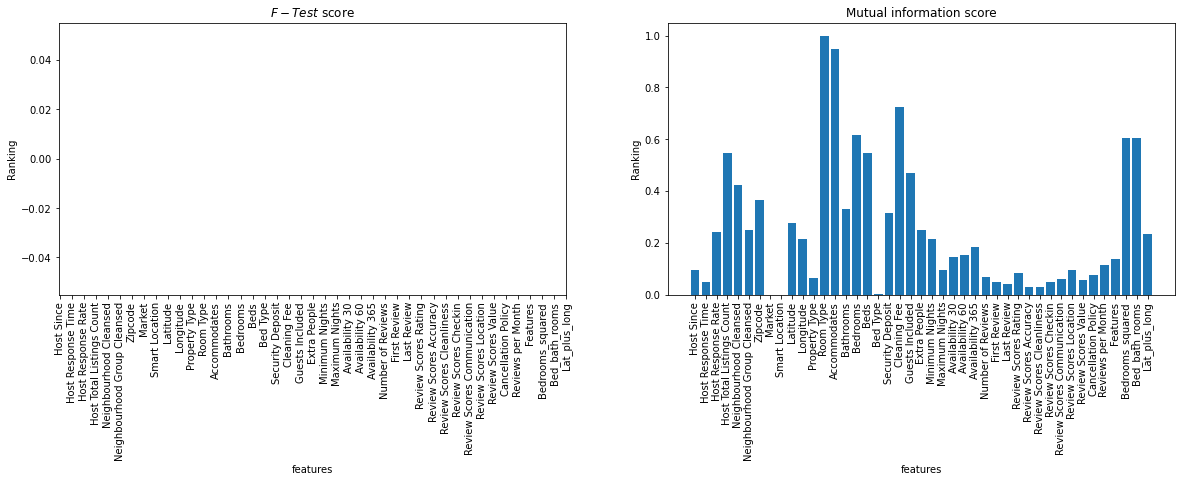

In [231]:
y = y_train    # nos quedamos con la 1ª columna, price
X = X_train      # nos quedamos con el resto

feature_names = columnas


# do calculations
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F-Test$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

In [232]:
f_test

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan])

In [233]:
f_regression(X, y)

(array([7.01704649e+01, 2.88306900e+01, 1.40449096e-01, 4.01653262e+02,
        1.39928748e+03, 6.62078157e+02, 9.77540314e+02, 1.35169110e+01,
                   nan, 5.07553213e+01, 9.63211292e+00, 1.36967026e+02,
        2.92225220e+03, 5.36663699e+03, 1.41227957e+03, 3.88436030e+03,
        3.14513434e+03, 1.26823976e+01, 6.35016062e+02, 3.92276286e+03,
        1.64628822e+03, 1.47968321e+02, 9.07863080e+01, 2.51382017e+01,
        3.68954275e+00, 1.83884199e-01, 5.90032739e+01, 1.18854200e+01,
        9.70364193e-02, 1.44572672e+00, 2.20288092e+01, 2.35376317e+01,
        4.52507637e+01, 1.12366078e+00, 9.86031301e-02, 1.32802472e+02,
        2.35658751e+00, 2.33094446e+02, 3.60573934e+01, 2.29398155e+02,
        3.24410091e+03, 4.10176181e+03, 1.38816104e+01]),
 array([6.13251999e-017, 8.06729901e-008, 7.07842520e-001, 1.03423890e-087,
        1.25875917e-287, 1.20995990e-141, 2.85561726e-205, 2.37601379e-004,
                    nan, 1.11485137e-012, 1.91712133e-003, 1.92069390e

In [234]:
mi

array([0.09366096, 0.04822465, 0.24110946, 0.54867114, 0.42505028,
       0.25011355, 0.36478065, 0.        , 0.        , 0.27532817,
       0.21555344, 0.0630626 , 1.        , 0.94905377, 0.32929303,
       0.61590736, 0.54717638, 0.00378637, 0.31323115, 0.72525322,
       0.46910014, 0.25079563, 0.21585094, 0.09396701, 0.14627788,
       0.15210821, 0.18407347, 0.06896157, 0.04767055, 0.03958432,
       0.08267159, 0.0276334 , 0.02774069, 0.04765773, 0.05991001,
       0.09456547, 0.05714271, 0.07501709, 0.1142172 , 0.13818372,
       0.60434812, 0.60424739, 0.23468681])

Podemos ver qué columnas superan un umbral determinado, pongamos 0,3 en el mutual info, que resultan ser 13. Muchas de ellas son de carácter geográfico, lo cual tiene sentido, además de features que suponíamos que eran importantes, como los baños o los dormitorios. Dos de las columnas añadidas, 'Bedrooms_squared', 'Bed_bath_rooms' están entre las más importantes.

Smart Location y Market no tienen importancia, lo cual era de esperar, porque son comunes a todas las filas. Quizás las deberíamos haber quitado...

In [235]:
columnas_MI = columnas[mi > 0.30]

In [236]:
columnas_MI

Index(['Host Total Listings Count', 'Neighbourhood Cleansed', 'Zipcode',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Bedrooms_squared', 'Bed_bath_rooms'],
      dtype='object')

In [237]:
len(columnas_MI)

13

Ahora vamos con el modelo de Lasso, cargando las librerías necesarias.

In [238]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [239]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [240]:
feature_names = columnas

Ejecutamos el escalado de train y test, con el scaler definido a través del train para evitar leakage.

In [241]:
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test)

Ejecutamos Lasso, y, tras variar algo los parámetros encontramos un alpha óptimo, como se ve en la gráfica.

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.8s finished


best mean cross-validation score: -1301.948
best parameters: {'alpha': 0.45487779470037754}


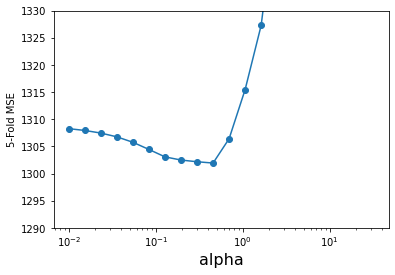

In [248]:
alpha_vector = np.logspace(-2,1.5,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10, verbose = 1)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.ylim(1290, 1330)
plt.show()

En principio examinamos los resultados que obtenemos utilizanzo el alpha óptimo. El RMSE que nos sale es de 33-35 en train y test euros para train y test, lo cual pienso que compara favorablemente con la std de esta columna (56 euros), con lo que en principio lo podríamos dar como aceptable. Los errores de train y test no hacen pensar que estemos en overfittig tampoco.

Ahora bien, podemos incrementar el alpha hasta eliminar una serie de variables sin que el error se incremente de forma apreciable, y eso es lo que hacemos, tomando un valor de 1,25. De esta forma mejoramos algo la interpretabilidad.

In [256]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']

alpha_optimo = 1.25

lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 1.3e+03
MSE Modelo Lasso (test) : 1.16e+03
RMSE Modelo Lasso (train): 36.1
RMSE Modelo Lasso (test) : 34
Host Since -0.0
Host Response Time 0.0
Host Response Rate -0.2595689993781937
Host Total Listings Count 0.5202281474096254
Neighbourhood Cleansed 8.035933311283829
Neighbourhood Group Cleansed 0.0
Zipcode 1.1641470392123956
Market 0.4876860136931119
Smart Location 0.0
Latitude -0.0
Longitude -0.0
Property Type 0.0
Room Type 12.578390289395836
Accommodates 10.397530409475518
Bathrooms 0.0
Bedrooms 2.4667980831813754
Beds 0.0
Bed Type 0.0
Security Deposit 2.6011023309792587
Cleaning Fee 14.38668781986093
Guests Included 0.13731044847480897
Extra People -0.2395162260898541
Minimum Nights -0.0
Maximum Nights 0.0
Availability 30 4.538182530822591
Availability 60 0.0
Availability 365 0.0
Number of Reviews -1.2789731872668308
First Review 0.21909927259114648
Last Review -0.0
Review Scores Rating 1.2439415302897627
Review Scores Accuracy 0.5703250880910501
Review S

Podemos intentar mejorar el modelo viendo si Precios se puede transformar en normal aplicándole un logaritmo. Si lo hacemos tiene una forma parecida a una normal, pero hay un vacío de datos justo al medio de todas formas.

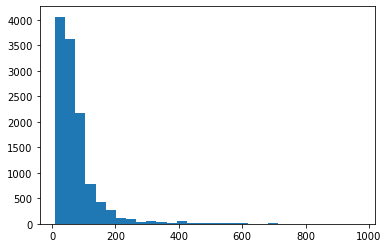

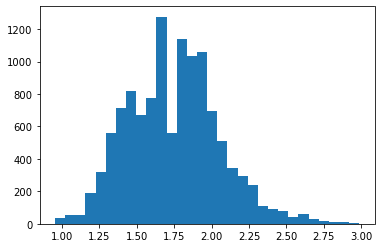

In [258]:
plt.hist(df['Price'], bins = 30)
plt.show()

plt.hist(np.log10(df['Price']), bins = 30)
plt.show()

Transformamos las variables 'y' de train y test, aplicamos lasso, buscando el alpha óptimo.

In [269]:
y_train_log = np.log10(y_train)

In [270]:
y_test_log = np.log10(y_test)

In [271]:
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   12.9s finished


best mean cross-validation score: -0.024
best parameters: {'alpha': 0.0004281332398719391}


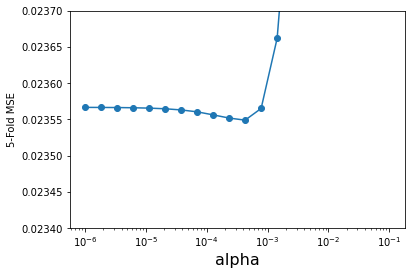

In [272]:
alpha_vector = np.logspace(-6,-1,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10, verbose = 1)
grid.fit(XtrainScaled, y_train_log)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.ylim(0.0234, 0.0237)
plt.show()

Aplicando el alpha óptimo encontramos unos errores bastante parecidos, no hay una mejora pues del modelo, qué le vamos a hacer.

In [274]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']

#alpha_optimo = 1.25

lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train_log)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(10**y_train_log,10**ytrainLasso)
mseTestModelLasso = mean_squared_error(10**y_test_log,10**ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 1.58e+03
MSE Modelo Lasso (test) : 1.12e+03
RMSE Modelo Lasso (train): 39.7
RMSE Modelo Lasso (test) : 33.4
Host Since -0.009118335790952786
Host Response Time -0.0
Host Response Rate -0.003924059996401502
Host Total Listings Count 0.004493303506433513
Neighbourhood Cleansed 0.0406083958476488
Neighbourhood Group Cleansed 0.017914204529531793
Zipcode 0.01352694786309337
Market 0.0018766077187168672
Smart Location 0.0
Latitude 0.001744706253297366
Longitude 0.0004906431449254546
Property Type -0.0029062786106413257
Room Type 0.14663852138068803
Accommodates 0.06313558961358352
Bathrooms 0.00687107198671302
Bedrooms 0.05835024361850171
Beds -0.025970685422499185
Bed Type 0.0032010403633734655
Security Deposit 0.014756417261139718
Cleaning Fee 0.039564706044281875
Guests Included 0.01291538393984641
Extra People -0.009430244660629113
Minimum Nights -0.010988684151128166
Maximum Nights 8.266790096647164e-05
Availability 30 0.031176696060472135
Availability 60 -0.0

Finalizamos la práctica probando un modelo de random forest regressor, aunque sea de forma simplificada, pues aplicaremos Gridsearch a solo uno de los parámetros, la profundidad. En árboles no es necesario el escalado, así que utilizamos train y test originales.

Lo ejecutamos, y obtenemos el máximo en 14, aunque como esperábamos, la mejora se va haciendo cada vez menor con cada nivel adicional.

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  1.4min finished


best mean cross-validation score: 0.662
best parameters: {'max_depth': 14}


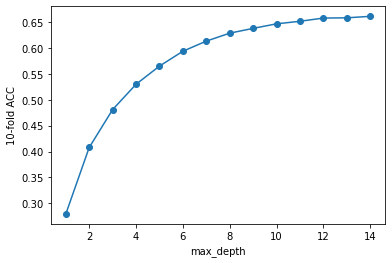

In [275]:
from sklearn.ensemble import RandomForestRegressor

# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), 
                    param_grid=tuned_parameters,cv=5, verbose = 1) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

Es mejor adoptar una profundidad algo menor, pongamos 9. La separación entre los scores de train y test se va haciendo más grande, indicando overfitting.

In [282]:
maxDepthOptimo = 9 #grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.7851360318239987
Test:  0.643495065587722


Es interesante ver la importancia de las variables según randon forest. Lo cierto es que tiende a destacar las que ya destacó Lasso, aunque en este caso la más importante resulta Bed_bath_rooms, una de las que introdujimos. La mayor parte de las variables no tienen gran importancia, y quizás al utilizarlas todas es la razón que de tengamos síntomas de overfitting.

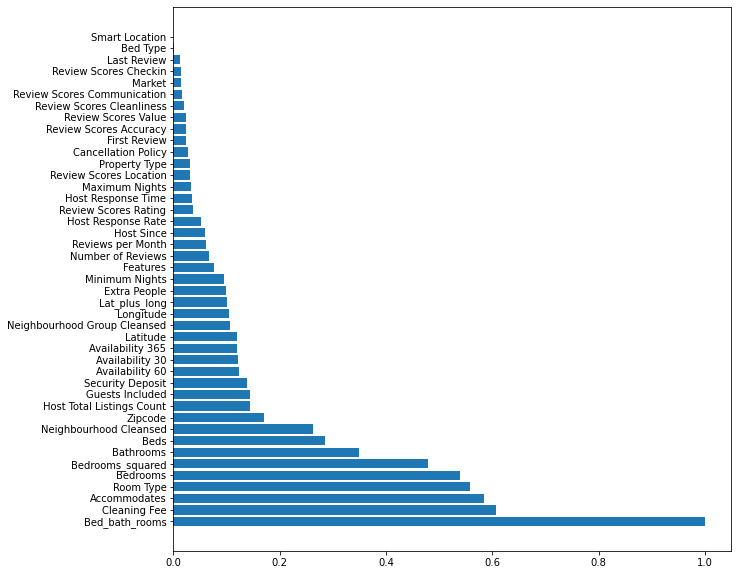

In [278]:
importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()